In [1]:
## Further  recommendation, test multiple frameworks, see what works better on average. 
## Open source RL: https://docs.google.com/spreadsheets/d/1EeFPd-XIQ3mq_9snTlAZSsFY7Hbnmd7P5bbT8LPuMn0/edit#gid=0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
print(tf.__version__)

/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-

1.14.0


/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sahand/anaconda3/envs/Doo

## Trading Strategies

This notebook is part of a series on machine learning asset managment. https://ssrn.com/abstract=3420952

I have had some enquiries about future releases, I will post future content on the [FirmAI](https://www.linkedin.com/company/18004273/admin/) Linkedin page.

In [2]:
## Save future files to your drive
## In this notebook control for multiple testing


In [4]:


df_full = pd.read_csv('AAPL.csv')
df_full.reset_index(inplace = False) 

df_full.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-03,36.441429,36.968571,36.357143,36.967144,32.261719,130197200
1,2010-09-07,36.662857,37.075714,36.607143,36.830002,32.142021,85639400
2,2010-09-08,37.111427,37.770000,37.014286,37.560001,32.779102,131637800
3,2010-09-09,37.862858,38.074287,37.560001,37.581429,32.797817,109643800
4,2010-09-10,37.598572,37.785713,37.342857,37.630001,32.840195,96885600


#  Agents

* Turtle Trading agent
* Moving Average agent
* Signal Rolling agent
* Policy Gradient agent
* Q-learning agent
* Evolution Strategy agent
* Double Q-learning agent
* Recurrent Q-learning agent
* Double Recurrent Q-learning agent
* Duel Q-learning agent
* Double Duel Q-learning agent
* Duel Recurrent Q-learning agent
* Double Duel Recurrent Q-learning agent
* Actor-critic agent
* Actor-critic Duel agent
* Actor-critic Recurrent agent
* Actor-critic Duel Recurrent agent
* Curiosity Q-learning agent
* Recurrent Curiosity Q-learning agent
* Duel Curiosity Q-learning agent
* Neuro-evolution agent
* Neuro-evolution with Novelty search agent
* ABCD strategy agent
* Deep Evolution Strategy






## Turtle Trading Agent

In [3]:
df= df_full.copy()
name = 'Turtle Trading Agent'
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

NameError: name 'df_full' is not defined

In [5]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [6]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 262: cannot sell anything, inventory 0
day 263: cannot sell anything, inventory 0
day 281: cannot sell anything, inventory 0
day 283: cannot sell anything, inventory 0
day 338: cannot sell anything, inventory 0
day 340: cannot sell anything, inventory 0
day 344: cannot sell anything, inventory 0
day 345: cannot sell anything, inventory 0
day 350: cannot sell anything, inventory 0
day 352: cannot sell anything, inventory 0
day 353: cannot sell anything, inventory 0
day 354: cannot sell anything, inventory 0
day 357: cannot sell anything, inventory 0
day 358: cannot sell anything, inventory 0
day 359: cannot sell anything, inventory 0
day 360: cannot sell anything, inventory 0
day 361: cannot sell anything, inventory 0
day 362: cannot sell anything, inventory 0
day 363: cannot sell anything, inventory 0
day 364: cannot sell anything, inventory 0
day 368: cannot sell anything, inventory 0
day 370: cannot sell anything, inventory 0
day 371: cannot sell anything, inventory 0
day 372: ca

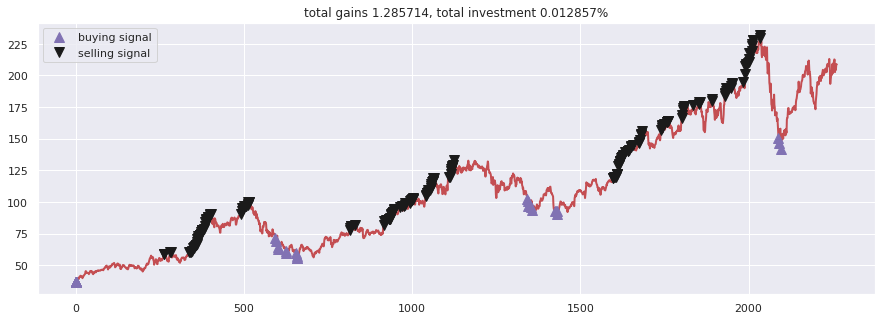

In [7]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()


## Moving Average agent

In [8]:
df= df_full.copy()
name = 'Moving Average agent'

short_window = int(0.025 * len(df))
long_window = int(0.05 * len(df))

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

signals['short_ma'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_ma'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

signals

,signal,short_ma,long_ma,positions
0,0.0,36.967144,36.967144,NaN
1,0.0,36.898573,36.898573,0.0
2,0.0,37.119049,37.119049,0.0
3,0.0,37.234644,37.234644,0.0
4,0.0,37.313715,37.313715,0.0
...,...,...,...,...
2258,1.0,202.411965,197.930531,0.0
2259,1.0,202.662143,198.073363,0.0
2260,1.0,202.893393,198.241505,0.0
2261,1.0,203.146965,198.426018,0.0


In [9]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [10]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['positions'])

day 56: buy 1 units at price 44.104286, total balance 9955.895714
day 185, sell 1 units at price 49.689999, investment 12.664785 %, total balance 10005.585713,
day 225: buy 1 units at price 56.084286, total balance 9949.501427
day 565, sell 1 units at price 83.741432, investment 49.313539 %, total balance 10033.242859,
day 739: buy 1 units at price 69.938568, total balance 9963.304291
day 891, sell 1 units at price 76.124283, investment 8.844498 %, total balance 10039.428574,
day 927: buy 1 units at price 84.822861, total balance 9954.605713
day 1237, sell 1 units at price 115.400002, investment 36.048231 %, total balance 10070.005715,
day 1337: buy 1 units at price 106.820000, total balance 9963.185715
day 1349, sell 1 units at price 99.519997, investment -6.833929 %, total balance 10062.705712,
day 1431: buy 1 units at price 90.339996, total balance 9972.365716
day 1459, sell 1 units at price 95.550003, investment 5.767110 %, total balance 10067.915719,
day 1507: buy 1 units at price

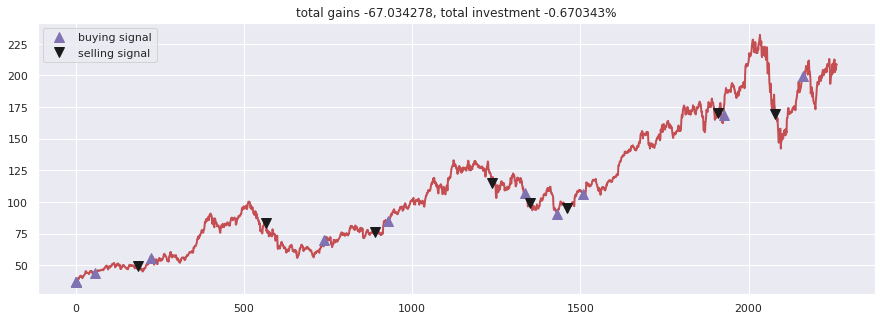

In [11]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Signal Rolling agent

In [12]:
df= df_full.copy()
name = 'Signal Rolling agent'

In [13]:
def buy_stock(
    real_movement,
    delay = 5,
    initial_state = 1,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    delay_change_decision = delay
    current_decision = 0
    state = initial_state
    current_val = real_movement[0]
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    if state == 1:
        initial_money, current_inventory = buy(
            0, initial_money, current_inventory
        )

    for i in range(1, real_movement.shape[0], 1):
        if real_movement[i] < current_val and state == 0:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 1
                initial_money, current_inventory = buy(
                    i, initial_money, current_inventory
                )
                current_decision = 0
                states_buy.append(i)
        if real_movement[i] > current_val and state == 1:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 0

                if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
                else:
                    if current_inventory > max_sell:
                        sell_units = max_sell
                    else:
                        sell_units = current_inventory
                    current_inventory -= sell_units
                    total_sell = sell_units * real_movement[i]
                    initial_money += total_sell
                    try:
                        invest = (
                            (real_movement[i] - real_movement[states_buy[-1]])
                            / real_movement[states_buy[-1]]
                        ) * 100
                    except:
                        invest = 0
                    print(
                        'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                        % (i, sell_units, total_sell, invest, initial_money)
                    )

                current_decision = 0
                states_sell.append(i)
        current_val = real_movement[i]
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [14]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, initial_state = 1, 
                                                         delay = 4, initial_money = 10000)

day 0: buy 1 units at price 36.967144, total balance 9963.032856
day 6, sell 1 units at price 38.294285, investment 3.590056 %, total balance 10001.327141,
day 19: buy 1 units at price 40.360001, total balance 9960.967140
day 25, sell 1 units at price 42.194286, investment 4.544809 %, total balance 10003.161426,
day 37: buy 1 units at price 43.975716, total balance 9959.185710
day 45, sell 1 units at price 45.517143, investment 3.505178 %, total balance 10004.702853,
day 51: buy 1 units at price 43.084286, total balance 9961.618567
day 59, sell 1 units at price 45.267143, investment 5.066481 %, total balance 10006.885710,
day 70: buy 1 units at price 45.755714, total balance 9961.129996
day 76, sell 1 units at price 46.451427, investment 1.520494 %, total balance 10007.581423,
day 86: buy 1 units at price 47.675713, total balance 9959.905710
day 92, sell 1 units at price 49.782856, investment 4.419741 %, total balance 10009.688566,
day 100: buy 1 units at price 49.029999, total balance

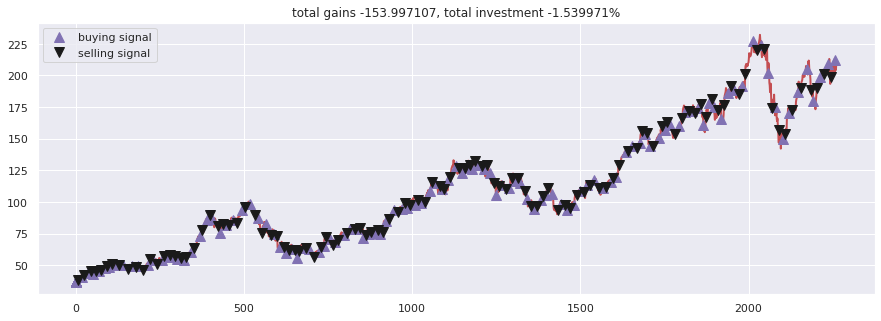

In [15]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Policy Gradient agent

In [16]:
df = df_full.copy()
name = 'Policy Gradient agent'
class Agent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [17]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = Agent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
epoch: 10, total rewards: 15183.347147.3, cost: -3647.289795, total money: 308.987172
epoch: 20, total rewards: 15179.958631.3, cost: -5357.321777, total money: 265.408611
epoch: 30, total rewards: 10500.034316.3, cost: -12747.724609, total money: 655.414276
epoch: 40, total rewards: 1629.635750.3, cost: -24227.869141, total money: 1376.505715
epoch: 50, total rewards: 1546.892824.3, cost: -25167.443359, total money: 632.092804
epoch: 60, total rewards: 1956.977122.3, cost: -24938.251953, total money: 817.807077
epoch: 70, total rewards: 3083.917120.3, cost: -24538.093750, total money: 1489.717078
epoch: 80, total rewards: 2905.598612.3, cost: -26100.515625, total money: 2779.128577
epoch: 90, total rewards: 2265.028669.3, cost: -26963.652344, total money: 2951.638636
epoch: 100, total rewards: 2266.040064.3, co

In [18]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 2: buy 1 unit at price 37.560001, total balance 9962.439999
day 5, sell 1 unit at price 38.148571, investment 1.567013 %, total balance 10000.588570,
day 9: buy 1 unit at price 39.338570, total balance 9961.250000
day 11, sell 1 unit at price 40.538570, investment 3.050441 %, total balance 10001.788570,
day 13: buy 1 unit at price 41.274284, total balance 9960.514286
day 16, sell 1 unit at price 40.980000, investment -0.712996 %, total balance 10001.494286,
day 18: buy 1 unit at price 40.535713, total balance 9960.958573
day 19, sell 1 unit at price 40.360001, investment -0.433475 %, total balance 10001.318574,
day 20: buy 1 unit at price 39.805714, total balance 9961.512860
day 23: buy 1 unit at price 41.317142, total balance 9920.195718
day 25: buy 1 unit at price 42.194286, total balance 9878.001432
day 26, sell 1 unit at price 42.648571, investment 7.141831 %, total balance 9920.650003,
day 27: buy 1 unit at price 42.877144, total balance 9877.772859
day 28: buy 1 unit at price

day 601: buy 1 unit at price 62.840000, total balance 9925.594326
day 602, sell 1 unit at price 64.261429, investment -15.472497 %, total balance 9989.855755,
day 603: buy 1 unit at price 65.467140, total balance 9924.388615
day 605, sell 1 unit at price 65.070000, investment -17.037317 %, total balance 9989.458615,
day 610: buy 1 unit at price 66.888573, total balance 9922.570042
day 611, sell 1 unit at price 67.854286, investment -9.870966 %, total balance 9990.424328,
day 612: buy 1 unit at price 68.561432, total balance 9921.862896
day 613: buy 1 unit at price 66.842857, total balance 9855.020039
day 614: buy 1 unit at price 66.715714, total balance 9788.304325
day 615, sell 1 unit at price 66.655716, investment -11.178163 %, total balance 9854.960041,
day 616, sell 1 unit at price 65.737144, investment -12.101006 %, total balance 9920.697185,
day 617: buy 1 unit at price 65.712860, total balance 9854.984325
day 621: buy 1 unit at price 63.257141, total balance 9791.727184
day 622:

day 1212: buy 1 unit at price 125.430000, total balance 8212.972965
day 1213: buy 1 unit at price 126.599998, total balance 8086.372967
day 1215: buy 1 unit at price 126.000000, total balance 7960.372967
day 1216: buy 1 unit at price 125.690002, total balance 7834.682965
day 1217: buy 1 unit at price 122.570000, total balance 7712.112965
day 1218, sell 1 unit at price 120.070000, investment -3.356405 %, total balance 7832.182965,
day 1220, sell 1 unit at price 125.660004, investment -0.711120 %, total balance 7957.842969,
day 1221: buy 1 unit at price 125.610001, total balance 7832.232968
day 1224: buy 1 unit at price 129.619995, total balance 7702.612973
day 1225, sell 1 unit at price 132.070007, investment 4.115104 %, total balance 7834.682980,
day 1226: buy 1 unit at price 130.750000, total balance 7703.932980
day 1227: buy 1 unit at price 125.220001, total balance 7578.712979
day 1228, sell 1 unit at price 125.160004, investment -0.902612 %, total balance 7703.872983,
day 1229, sel

day 1890: buy 1 unit at price 179.979996, total balance 8317.253014
day 1892: buy 1 unit at price 179.970001, total balance 8137.283013
day 1893: buy 1 unit at price 178.440002, total balance 7958.843011
day 1894, sell 1 unit at price 178.649994, investment 2.690115 %, total balance 8137.493005,
day 1895: buy 1 unit at price 178.020004, total balance 7959.473001
day 1897: buy 1 unit at price 175.240005, total balance 7784.232996
day 1898: buy 1 unit at price 171.270004, total balance 7612.962992
day 1899, sell 1 unit at price 168.850006, investment -1.453245 %, total balance 7781.812998,
day 1900, sell 1 unit at price 164.940002, investment -4.736050 %, total balance 7946.753000,
day 1902, sell 1 unit at price 168.339996, investment -3.302889 %, total balance 8115.092996,
day 1903, sell 1 unit at price 166.479996, investment -1.770120 %, total balance 8281.572992,
day 1904: buy 1 unit at price 167.779999, total balance 8113.792993
day 1906, sell 1 unit at price 168.389999, investment -

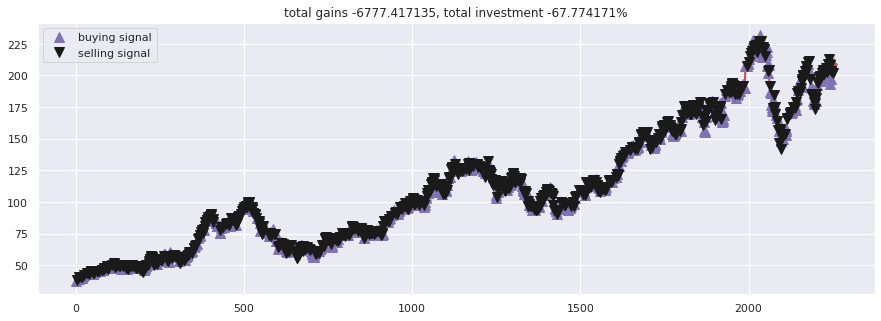

In [19]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Q-learning agent

In [20]:
from collections import deque
import random

df= df_full.copy()
name = 'Q-learning agent'

class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []

        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999

        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed, self.action_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())

    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [21]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

/home/sahand/anaconda3/envs/Doom/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 10, total rewards: 14677.611498.3, cost: 0.150025, total money: 1272.861451
epoch: 20, total rewards: 17574.431417.3, cost: 0.138074, total money: 807.531374
epoch: 30, total rewards: 17705.892869.3, cost: 0.123320, total money: 805.142789
epoch: 40, total rewards: 17920.518581.3, cost: 0.108296, total money: 800.698480
epoch: 50, total rewards: 17981.784299.3, cost: 0.093296, total money: 555.844232
epoch: 60, total rewards: 17807.124254.3, cost: 0.105507, total money: 489.574174
epoch: 70, total rewards: 17598.607110.3, cost: 0.072453, total money: 454.876988
epoch: 80, total rewards: 17163.159925.3, cost: 0.083985, total money: 543.919841
epoch: 90, total rewards: 17066.695695.3, cost: 0.115738, total money: 484.215620
epoch: 100, total rewards: 17347.417061.3, cost: 0.057215, total money: 584.476996
epoch: 110, total rewards: 17182.214245.3, cost: 0.053947, total money: 546.954187
epoch: 120, total rewards: 16997.081371.3, cost: 0.051838, total money: 615.621286
epoch: 130, 

In [22]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 10: buy 1 unit at price 40.461430, total balance 9959.538570
day 13, sell 1 unit at price 41.274284, investment 2.008960 %, total balance 10000.812854,
day 18: buy 1 unit at price 40.535713, total balance 9960.277141
day 19, sell 1 unit at price 40.360001, investment -0.433475 %, total balance 10000.637142,
day 21: buy 1 unit at price 41.277142, total balance 9959.360000
day 22: buy 1 unit at price 41.312859, total balance 9918.047141
day 23: buy 1 unit at price 41.317142, total balance 9876.729999
day 24: buy 1 unit at price 42.009998, total balance 9834.720001
day 25: buy 1 unit at price 42.194286, total balance 9792.525715
day 26: buy 1 unit at price 42.648571, total balance 9749.877144
day 27, sell 1 unit at price 42.877144, investment 3.876242 %, total balance 9792.754288,
day 29: buy 1 unit at price 44.962856, total balance 9747.791432
day 30: buy 1 unit at price 45.428570, total balance 9702.362862
day 32: buy 1 unit at price 44.361427, total balance 9658.001435
day 35, sell

day 608, sell 1 unit at price 65.405716, investment -3.952338 %, total balance 1133.570038,
day 610, sell 1 unit at price 66.888573, investment -5.059106 %, total balance 1200.458611,
day 611: buy 1 unit at price 67.854286, total balance 1132.604325
day 612: buy 1 unit at price 68.561432, total balance 1064.042893
day 613: buy 1 unit at price 66.842857, total balance 997.200036
day 614: buy 1 unit at price 66.715714, total balance 930.484322
day 616, sell 1 unit at price 65.737144, investment -7.537117 %, total balance 996.221466,
day 618: buy 1 unit at price 64.121429, total balance 932.100037
day 619: buy 1 unit at price 63.722858, total balance 868.377179
day 622: buy 1 unit at price 64.138573, total balance 804.238606
day 623: buy 1 unit at price 63.509998, total balance 740.728608
day 624: buy 1 unit at price 63.057144, total balance 677.671464
day 625: buy 1 unit at price 61.495716, total balance 616.175748
day 626: buy 1 unit at price 60.007141, total balance 556.168607
day 628,

day 1221, sell 1 unit at price 125.610001, investment 93.962318 %, total balance 447.365679,
day 1222: buy 1 unit at price 126.820000, total balance 320.545679
day 1223: buy 1 unit at price 128.509995, total balance 192.035684
day 1225: buy 1 unit at price 132.070007, total balance 59.965677
day 1227, sell 1 unit at price 125.220001, investment 86.716374 %, total balance 185.185678,
day 1228, sell 1 unit at price 125.160004, investment 90.043599 %, total balance 310.345682,
day 1229: buy 1 unit at price 124.500000, total balance 185.845682
day 1231, sell 1 unit at price 123.379997, investment 76.411958 %, total balance 309.225679,
day 1232, sell 1 unit at price 122.989998, investment 72.704106 %, total balance 432.215677,
day 1233: buy 1 unit at price 122.370003, total balance 309.845674
day 1234: buy 1 unit at price 121.300003, total balance 188.545671
day 1235: buy 1 unit at price 118.440002, total balance 70.105669
day 1236, sell 1 unit at price 114.639999, investment 61.169695 %, t

day 1946, sell 1 unit at price 187.500000, investment 84.729064 %, total balance 418.735604,
day 1947, sell 1 unit at price 186.869995, investment 84.708905 %, total balance 605.605599,
day 1948, sell 1 unit at price 190.240005, investment 81.908588 %, total balance 795.845604,
day 1950: buy 1 unit at price 193.309998, total balance 602.535606
day 1951: buy 1 unit at price 193.979996, total balance 408.555610
day 1952, sell 1 unit at price 193.460007, investment 82.854444 %, total balance 602.015617,
day 1953: buy 1 unit at price 191.699997, total balance 410.315620
day 1957: buy 1 unit at price 190.800003, total balance 219.515617
day 1959: buy 1 unit at price 188.740005, total balance 30.775612
day 1961, sell 1 unit at price 186.500000, investment 76.092902 %, total balance 217.275612,
day 1964: buy 1 unit at price 182.169998, total balance 35.105614
day 1968, sell 1 unit at price 185.110001, investment 74.418172 %, total balance 220.215615,
day 1969: buy 1 unit at price 187.179993, 

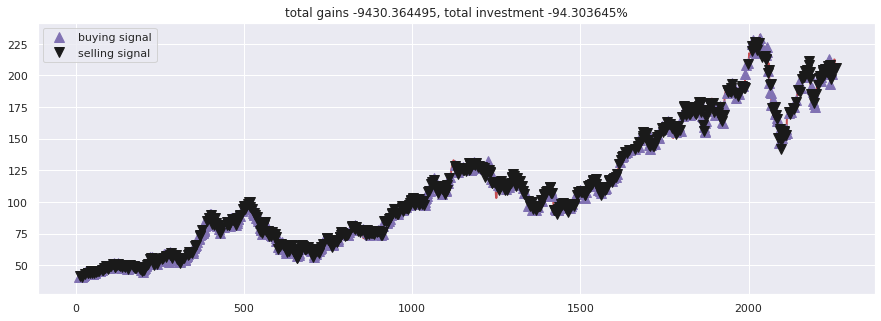

In [23]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Evolution Strategy agent

In [24]:
import pkg_resources
import types

df= df_full.copy()
name = 'Evolution Strategy agent'


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split('.')[0]
        elif isinstance(val, type):
            name = val.__module__.split('.')[0]
        poorly_named_packages = {'PIL': 'Pillow', 'sklearn': 'scikit-learn'}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name


imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != 'pip':
        requirements.append((m.project_name, m.version))

for r in requirements:
    print('{}=={}'.format(*r))

tensorflow==1.14.0
seaborn==0.9.0
pandas==0.25.1
numpy==1.17.1
matplotlib==3.1.1


In [25]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')


class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        return decision

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [26]:
class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(self, model, window_size, trend, skip, initial_money):
        self.model = model
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision = self.model.predict(np.array(sequence))
        return np.argmax(decision[0])
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        self.model.weights = weights
        state = self.get_state(0)
        inventory = []
        quantity = 0
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                starting_money -= close[t]
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                starting_money += self.trend[t]

            state = next_state
        return ((starting_money - initial_money) / initial_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        state = self.get_state(0)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest

In [28]:
close = df.Close.values.tolist()
window_size = 30
skip = 1
initial_money = 10000
import time
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(model = model, 
              window_size = window_size,
              trend = close,
              skip = skip,
              initial_money = initial_money)
agent.fit(iterations = 500, checkpoint = 10)

iter 10. reward: 33.763486
iter 20. reward: 14.553685
iter 30. reward: 22.458758
iter 40. reward: 49.198458
iter 50. reward: 55.439543
iter 60. reward: 91.938800
iter 70. reward: 72.409100
iter 80. reward: 107.435328
iter 90. reward: 77.288072
iter 100. reward: 93.697229
iter 110. reward: 108.856672
iter 120. reward: 90.501671
iter 130. reward: 140.269257
iter 140. reward: 155.849629
iter 150. reward: 134.233687
iter 160. reward: 158.765944
iter 170. reward: 175.594200
iter 180. reward: 203.223071
iter 190. reward: 210.165644
iter 200. reward: 225.119758
iter 210. reward: 230.297014
iter 220. reward: 238.918129
iter 230. reward: 239.642130
iter 240. reward: 261.635615
iter 250. reward: 255.833643
iter 260. reward: 268.213015
iter 270. reward: 273.941201
iter 280. reward: 281.757358
iter 290. reward: 287.310958
iter 300. reward: 283.687615
iter 310. reward: 295.127215
iter 320. reward: 303.029930
iter 330. reward: 287.531201
iter 340. reward: 291.231257
iter 350. reward: 307.804486
iter

In [29]:
states_buy, states_sell, total_gains, invest = agent.buy()

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 2: buy 1 unit at price 37.560001, total balance 9888.642853
day 3: buy 1 unit at price 37.581429, total balance 9851.061424
day 4: buy 1 unit at price 37.630001, total balance 9813.431423
day 5: buy 1 unit at price 38.148571, total balance 9775.282852
day 6: buy 1 unit at price 38.294285, total balance 9736.988567
day 7: buy 1 unit at price 38.602856, total balance 9698.385711
day 8: buy 1 unit at price 39.509998, total balance 9658.875713
day 9: buy 1 unit at price 39.338570, total balance 9619.537143
day 10: buy 1 unit at price 40.461430, total balance 9579.075713
day 11: buy 1 unit at price 40.538570, total balance 9538.537143
day 12: buy 1 unit at price 41.107143, total balance 9497.430000
day 13: buy 1 unit at price 41.274284, total balance 9456.155716
day 14: buy 1 unit at price 41.759998, total balance 9414.395718
day 15: buy 1 unit at price 41.5942

day 674: buy 1 unit at price 64.709999, total balance 1416.588616
day 676, sell 1 unit at price 63.408573, investment 33.676674 %, total balance 1479.997189,
day 677: buy 1 unit at price 61.264286, total balance 1418.732903
day 678: buy 1 unit at price 62.082859, total balance 1356.650044
day 679, sell 1 unit at price 61.894287, investment 29.231044 %, total balance 1418.544331,
day 680: buy 1 unit at price 63.275715, total balance 1355.268616
day 681: buy 1 unit at price 62.808571, total balance 1292.460045
day 682, sell 1 unit at price 63.049999, investment 32.124890 %, total balance 1355.510044,
day 683, sell 1 unit at price 63.162857, investment 28.806149 %, total balance 1418.672901,
day 685, sell 1 unit at price 63.062859, investment 26.331459 %, total balance 1481.735760,
day 686, sell 1 unit at price 63.564285, investment 24.566067 %, total balance 1545.300045,
day 688: buy 1 unit at price 64.247147, total balance 1481.052898
day 689, sell 1 unit at price 64.388573, investment 

day 1040: buy 1 unit at price 102.989998, total balance 141.282964
day 1043: buy 1 unit at price 105.110001, total balance 36.172963
day 1044, sell 1 unit at price 106.739998, investment 17.846157 %, total balance 142.912961,
day 1047: buy 1 unit at price 108.000000, total balance 34.912961
day 1048, sell 1 unit at price 109.400002, investment 24.853271 %, total balance 144.312963,
day 1049: buy 1 unit at price 108.599998, total balance 35.712965
day 1051, sell 1 unit at price 108.699997, investment 23.356518 %, total balance 144.412962,
day 1052, sell 1 unit at price 109.010002, investment 25.187852 %, total balance 253.422964,
day 1054: buy 1 unit at price 109.699997, total balance 143.722967
day 1055, sell 1 unit at price 111.250000, investment 28.932121 %, total balance 254.972967,
day 1056: buy 1 unit at price 112.820000, total balance 142.152967
day 1057, sell 1 unit at price 114.180000, investment 33.982632 %, total balance 256.332967,
day 1058, sell 1 unit at price 113.989998, 

day 1328: buy 1 unit at price 112.480003, total balance 652.782963
day 1329, sell 1 unit at price 110.489998, investment 81.008213 %, total balance 763.272961,
day 1330: buy 1 unit at price 111.339996, total balance 651.932965
day 1331: buy 1 unit at price 108.980003, total balance 542.952962
day 1332: buy 1 unit at price 106.029999, total balance 436.922963
day 1333, sell 1 unit at price 107.330002, investment 76.152966 %, total balance 544.252965,
day 1336: buy 1 unit at price 108.029999, total balance 436.222966
day 1337: buy 1 unit at price 106.820000, total balance 329.402966
day 1339: buy 1 unit at price 107.320000, total balance 222.082966
day 1340: buy 1 unit at price 105.260002, total balance 116.822964
day 1342: buy 1 unit at price 102.709999, total balance 14.112965
day 1369, sell 1 unit at price 93.989998, investment 53.923350 %, total balance 108.102963,
day 1372: buy 1 unit at price 96.260002, total balance 11.842961
day 1373, sell 1 unit at price 96.040001, investment 56

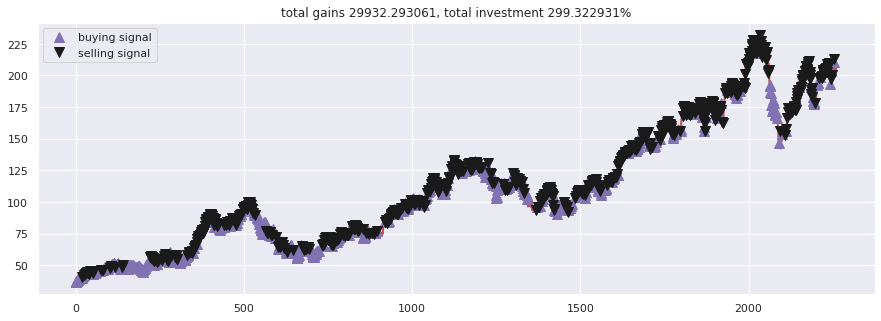

In [30]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Double Q-learning agent

In [31]:
from collections import deque
import random

df= df_full.copy()
name = 'Double Q-learning agent'

class Model:
    def __init__(self, input_size, output_size, layer_size, learning_rate):
        self.X = tf.placeholder(tf.float32, (None, input_size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        feed_forward = tf.layers.dense(self.X, layer_size, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, output_size)
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 500
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.model = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.model_negative = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
        self.trainable = tf.trainable_variables()
    
    def _assign(self):
        for i in range(len(self.trainable)//2):
            assign_op = self.trainable[i+len(self.trainable)//2].assign(self.trainable[i])
            self.sess.run(assign_op)

    def _memorize(self, state, action, reward, new_state, done):
        self.MEMORIES.append((state, action, reward, new_state, done))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.predict(states)
        Q_new = self.predict(new_states)
        Q_new_negative = self.sess.run(self.model_negative.logits, feed_dict={self.model_negative.X:new_states})
        replay_size = len(replay)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, done_r = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not done_r:
                target[action_r] += self.GAMMA * Q_new_negative[i, np.argmax(Q_new[i])]
            X[i] = state_r
            Y[i] = target
        return X, Y

    def predict(self, inputs):
        return self.sess.run(self.model.logits, feed_dict={self.model.X:inputs})
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign()
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                state = next_state
                X, Y = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.model.cost, self.model.optimizer], 
                                        feed_dict={self.model.X: X, self.model.Y:Y})
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [32]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 728.472845.3, cost: 0.137583, total money: 9496.672857
epoch: 20, total rewards: 1191.017082.3, cost: 0.173999, total money: 10363.507072
epoch: 30, total rewards: 776.065739.3, cost: 0.012670, total money: 10364.045735
epoch: 40, total rewards: 246.747026.3, cost: 0.019810, total money: 8620.147035
epoch: 50, total rewards: 307.267256.3, cost: 0.054926, total money: 10307.267256
epoch: 60, total rewards: 206.837333.3, cost: 0.082771, total money: 10206.837333
epoch: 70, total rewards: 241.774338.3, cost: 0.014308, total money: 9625.594330
epoch: 80, total rewards: 497.491395.3, cost: 0.021866, total money: 9876.861390
epoch: 90, total rewards: 88.564323.3, cost: 0.009798, total money: 10088.564323
epoch: 100, total rewards: 97.908554.3, cost: 0.009461, total money: 9681.288543
epoch: 110, total rewards: 197.652862.3, cost: 0.003624, total money: 10197.652862
epoch: 120, total rewards: 164.024233.3, cost: 0.004672, total money: 9749.484239
epoch: 130, total re

In [33]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 1: buy 1 unit at price 36.830002, total balance 9963.169998
day 2, sell 1 unit at price 37.560001, investment 1.982077 %, total balance 10000.729999,
day 7: buy 1 unit at price 38.602856, total balance 9962.127143
day 8: buy 1 unit at price 39.509998, total balance 9922.617145
day 9, sell 1 unit at price 39.338570, investment 1.905854 %, total balance 9961.955715,
day 10, sell 1 unit at price 40.461430, investment 2.408079 %, total balance 10002.417145,
day 30: buy 1 unit at price 45.428570, total balance 9956.988575
day 31, sell 1 unit at price 44.212856, investment -2.676100 %, total balance 10001.201431,
day 32: buy 1 unit at price 44.361427, total balance 9956.840004
day 33, sell 1 unit at price 44.217144, investment -0.325244 %, total balance 10001.057148,
day 43: buy 1 unit at price 45.467144, total balance 9955.590004
day 46, sell 1 unit at price 45.154285, investment -0.688099 %, total balance 10000.744289,
day 55: buy 1 unit at price 44.765713, total balance 9955.978576
da

day 1099, sell 1 unit at price 105.989998, investment -0.777010 %, total balance 10030.579984,
day 1105: buy 1 unit at price 109.139999, total balance 9921.439985
day 1107: buy 1 unit at price 118.900002, total balance 9802.539983
day 1111, sell 1 unit at price 119.559998, investment 9.547370 %, total balance 9922.099981,
day 1113, sell 1 unit at price 118.930000, investment 0.025230 %, total balance 10041.029981,
day 1120: buy 1 unit at price 128.720001, total balance 9912.309980
day 1121: buy 1 unit at price 128.449997, total balance 9783.859983
day 1122, sell 1 unit at price 129.500000, investment 0.605966 %, total balance 9913.359983,
day 1123, sell 1 unit at price 133.000000, investment 3.542237 %, total balance 10046.359983,
day 1132: buy 1 unit at price 126.599998, total balance 9919.759985
day 1133, sell 1 unit at price 127.139999, investment 0.426541 %, total balance 10046.899984,
day 1137: buy 1 unit at price 123.589996, total balance 9923.309988
day 1138, sell 1 unit at pric

day 2222, sell 1 unit at price 204.229996, investment -0.088062 %, total balance 9943.190005,
day 2227: buy 1 unit at price 203.300003, total balance 9739.890002
day 2228, sell 1 unit at price 205.210007, investment 0.939500 %, total balance 9945.100009,
day 2229: buy 1 unit at price 204.500000, total balance 9740.600009
day 2230: buy 1 unit at price 203.350006, total balance 9537.250003
day 2231, sell 1 unit at price 205.660004, investment 0.567239 %, total balance 9742.910007,
day 2232, sell 1 unit at price 202.589996, investment -0.373745 %, total balance 9945.500003,
day 2242: buy 1 unit at price 204.020004, total balance 9741.479999
day 2243: buy 1 unit at price 193.339996, total balance 9548.140003
day 2244, sell 1 unit at price 197.000000, investment -3.440841 %, total balance 9745.140003,
day 2245, sell 1 unit at price 199.039993, investment 2.948173 %, total balance 9944.179996,
day 2251: buy 1 unit at price 201.740005, total balance 9742.439991
day 2252, sell 1 unit at price 

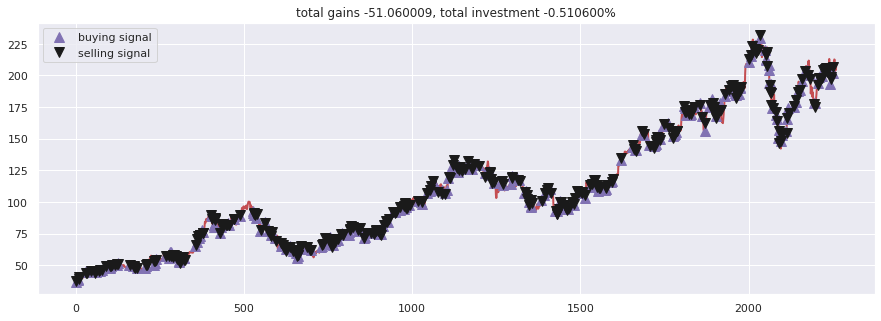

In [34]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Recurrent Q-learning agent

In [35]:
from collections import deque
import random

df= df_full.copy()
name = 'Recurrent Q-learning agent'
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.X = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.OUTPUT_SIZE))
        cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
        self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * self.LAYER_SIZE))
        self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
        self.logits = tf.layers.dense(self.rnn[:,-1], self.OUTPUT_SIZE)
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.logits, feed_dict={self.X:states, self.hidden_layer:init_values})
        Q_new = self.sess.run(self.logits, feed_dict={self.X:new_states, self.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * np.amax(Q_new[i])
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.logits,self.last_state],
                                                feed_dict={self.X:[self.INITIAL_FEATURES],
                                                            self.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.cost, self.optimizer], 
                                        feed_dict={self.X: X, self.Y:Y,
                                                  self.hidden_layer: INIT_VAL})
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
                
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [36]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
epoch: 10, total rewards: 5192.671373.3, cost: 88.956985, total money: 10185.851366
epoch: 20, total rewards: 5131.428527.3, cost: 1.584362, total money: 2687.058531
epoch: 30, total rewards: 3857.125668.3, cost: 372.397034, total money: 13445.105664
epoch: 40, total rewards: 6450.642881.3, cost: 8.893133, total money: 4570.202925
epoch: 50, total rewards: 298.867044.3, cost: 7.431132, total money: 9889.737040
epoch: 60, total rewards: 871.451661.3, cost: 41.633923, total money: 7590.361650
epoch: 70, total rewards: 4024.851620.3, cost: 95.397720, total money: 11333.741635
epoch: 80, total rewards: 902.783008.3, cost: 606.629211, total money: 10902.

In [37]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 227: buy 1 unit at price 55.782856, total balance 9944.217144
day 233, sell 1 unit at price 50.458572, investment -9.544660 %, total balance 9994.675716,
day 240: buy 1 unit at price 54.348572, total balance 9940.327144
day 241: buy 1 unit at price 52.292858, total balance 9888.034286
day 242: buy 1 unit at price 50.861427, total balance 9837.172859
day 243: buy 1 unit at price 50.919998, total balance 9786.252861
day 244: buy 1 unit at price 53.371429, total balance 9732.881432
day 245: buy 1 unit at price 53.740002, total balance 9679.141430
day 246, sell 1 unit at price 53.388573, investment -1.766374 %, total balance 9732.530003,
day 247: buy 1 unit at price 54.797142, total balance 9677.732861
day 248: buy 1 unit at price 55.709999, total balance 9622.022862
day 249: buy 1 unit at price 55.712856, total balance 9566.310006
day 250, sell 1 unit at price 54.975716, investment 5.130448 %, total balance 9621.285722,
day 251: buy 1 unit at price 54.432858, total balance 9566.852864

day 406: buy 1 unit at price 82.875717, total balance 2925.871445
day 407: buy 1 unit at price 87.099998, total balance 2838.771447
day 408: buy 1 unit at price 86.905716, total balance 2751.865731
day 409: buy 1 unit at price 83.919998, total balance 2667.945733
day 410: buy 1 unit at price 81.854286, total balance 2586.091447
day 411: buy 1 unit at price 81.671425, total balance 2504.420022
day 412: buy 1 unit at price 80.040001, total balance 2424.380021
day 413: buy 1 unit at price 87.142860, total balance 2337.237161
day 414: buy 1 unit at price 86.814285, total balance 2250.422876
day 415, sell 1 unit at price 86.142860, investment 59.418383 %, total balance 2336.565736,
day 416, sell 1 unit at price 83.425713, investment 54.749978 %, total balance 2419.991449,
day 417, sell 1 unit at price 83.161430, investment 57.417527 %, total balance 2503.152879,
day 418: buy 1 unit at price 83.711426, total balance 2419.441453
day 419, sell 1 unit at price 83.117142, investment 45.349624 %,

day 580: buy 1 unit at price 74.309998, total balance 12489.814317
day 581: buy 1 unit at price 73.285713, total balance 12416.528604
day 582: buy 1 unit at price 73.580002, total balance 12342.948602
day 583, sell 1 unit at price 72.798569, investment -2.033951 %, total balance 12415.747171,
day 584, sell 1 unit at price 76.024284, investment 3.736842 %, total balance 12491.771455,
day 585, sell 1 unit at price 78.432854, investment 6.595341 %, total balance 12570.204309,
day 587: buy 1 unit at price 75.285713, total balance 12494.918596
day 588, sell 1 unit at price 74.842857, investment -0.588234 %, total balance 12569.761453,
day 591: buy 1 unit at price 74.787140, total balance 12494.974313
day 592, sell 1 unit at price 74.328575, investment -0.613160 %, total balance 12569.302888,
day 603: buy 1 unit at price 65.467140, total balance 12503.835748
day 604, sell 1 unit at price 65.261429, investment -0.314220 %, total balance 12569.097177,
day 615: buy 1 unit at price 66.655716, to

day 1370: buy 1 unit at price 96.639999, total balance 12499.501466
day 1372, sell 1 unit at price 96.260002, investment -0.393209 %, total balance 12595.761468,
day 1375: buy 1 unit at price 94.690002, total balance 12501.071466
day 1376, sell 1 unit at price 96.099998, investment 1.489065 %, total balance 12597.171464,
day 1384: buy 1 unit at price 101.870003, total balance 12495.301461
day 1385: buy 1 unit at price 101.029999, total balance 12394.271462
day 1386, sell 1 unit at price 101.120003, investment -0.736232 %, total balance 12495.391465,
day 1387, sell 1 unit at price 101.169998, investment 0.138572 %, total balance 12596.561463,
day 1388: buy 1 unit at price 102.260002, total balance 12494.301461
day 1390, sell 1 unit at price 104.580002, investment 2.268727 %, total balance 12598.881463,
day 1396: buy 1 unit at price 106.129997, total balance 12492.751466
day 1397, sell 1 unit at price 105.669998, investment -0.433430 %, total balance 12598.421464,
day 1402: buy 1 unit at

day 1967: buy 1 unit at price 185.500000, total balance 12441.631496
day 1968, sell 1 unit at price 185.110001, investment -0.210242 %, total balance 12626.741497,
day 1973: buy 1 unit at price 190.580002, total balance 12436.161495
day 1974: buy 1 unit at price 190.350006, total balance 12245.811489
day 1975: buy 1 unit at price 187.880005, total balance 12057.931484
day 1977, sell 1 unit at price 191.330002, investment 0.393536 %, total balance 12249.261486,
day 1979, sell 1 unit at price 191.449997, investment 0.577878 %, total balance 12440.711483,
day 1982, sell 1 unit at price 191.440002, investment 1.894825 %, total balance 12632.151485,
day 1993: buy 1 unit at price 209.070007, total balance 12423.081478
day 1994, sell 1 unit at price 207.110001, investment -0.937488 %, total balance 12630.191479,
day 1995: buy 1 unit at price 207.250000, total balance 12422.941479
day 1996: buy 1 unit at price 208.880005, total balance 12214.061474
day 1997: buy 1 unit at price 207.529999, tot

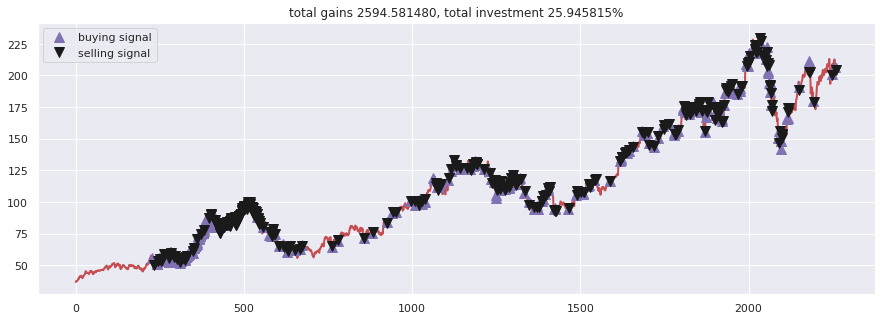

In [38]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Double Recurrent Q-learning agent

In [39]:
from collections import deque
import random


df= df_full.copy()
name = 'Double Recurrent Q-learning agent'


class Model:
    def __init__(self, input_size, output_size, layer_size, learning_rate, name):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            cell = tf.nn.rnn_cell.LSTMCell(layer_size, state_is_tuple = False)
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * layer_size))
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            self.logits = tf.layers.dense(self.rnn[:,-1], output_size)
            self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.model = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE,
                           'real_model')
        self.model_negative = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE,
                                   'negative_model')
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
        self.trainable = tf.trainable_variables()
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)

    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.model.logits, feed_dict={self.model.X:states, 
                                                   self.model.hidden_layer:init_values})
        Q_new = self.sess.run(self.model.logits, feed_dict={self.model.X:new_states, 
                                                       self.model.hidden_layer:init_values})
        Q_new_negative = self.sess.run(self.model_negative.logits, 
                                  feed_dict={self.model_negative.X:new_states, 
                                             self.model_negative.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * Q_new_negative[i, np.argmax(Q_new[i])]
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.model.logits,self.model.last_state],
                                                feed_dict={self.model.X:[self.INITIAL_FEATURES],
                                                            self.model.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('real_model', 'negative_model')
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.model.logits,
                                                  self.model.last_state],
                                                  feed_dict={self.model.X:[self.INITIAL_FEATURES],
                                                             self.model.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.model.cost, self.model.optimizer], 
                                        feed_dict={self.model.X: X, self.model.Y:Y,
                                                  self.model.hidden_layer: INIT_VAL})
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [40]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 2485.805627.3, cost: 0.087183, total money: 11022.355614
epoch: 20, total rewards: 1039.462690.3, cost: 0.025218, total money: 9011.602706
epoch: 30, total rewards: 52.242638.3, cost: 0.729423, total money: 2186.732630
epoch: 40, total rewards: 311.234254.3, cost: 0.063245, total money: 8657.284243
epoch: 50, total rewards: 1290.245828.3, cost: 0.093539, total money: 9456.975824
epoch: 60, total rewards: 954.375917.3, cost: 0.197580, total money: 6826.215901
epoch: 70, total rewards: 686.571237.3, cost: 0.207274, total money: 10076.841241
epoch: 80, total rewards: 1518.447091.3, cost: 0.274904, total money: 9072.647105
epoch: 90, total rewards: 2263.037135.3, cost: 4.230272, total money: 10209.817135
epoch: 100, total rewards: 768.845730.3, cost: 0.082119, total money: 10768.845730
epoch: 110, total rewards: 1475.857110.3, cost: 0.070862, total money: 9843.037119
epoch: 120, total rewards: 1351.734309.3, cost: 0.166510, total money: 9285.274289
epoch: 130, tot

In [41]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 2: buy 1 unit at price 37.560001, total balance 9888.642853
day 3: buy 1 unit at price 37.581429, total balance 9851.061424
day 4: buy 1 unit at price 37.630001, total balance 9813.431423
day 5: buy 1 unit at price 38.148571, total balance 9775.282852
day 6: buy 1 unit at price 38.294285, total balance 9736.988567
day 7: buy 1 unit at price 38.602856, total balance 9698.385711
day 8: buy 1 unit at price 39.509998, total balance 9658.875713
day 9: buy 1 unit at price 39.338570, total balance 9619.537143
day 10: buy 1 unit at price 40.461430, total balance 9579.075713
day 11: buy 1 unit at price 40.538570, total balance 9538.537143
day 12: buy 1 unit at price 41.107143, total balance 9497.430000
day 13: buy 1 unit at price 41.274284, total balance 9456.155716
day 14: buy 1 unit at price 41.759998, total balance 9414.395718
day 15: buy 1 unit at price 41.5942

day 171: buy 1 unit at price 49.921429, total balance 2107.491435
day 172: buy 1 unit at price 49.604286, total balance 2057.887149
day 173: buy 1 unit at price 49.509998, total balance 2008.377151
day 174: buy 1 unit at price 48.642857, total balance 1959.734294
day 175: buy 1 unit at price 47.614285, total balance 1912.120009
day 176: buy 1 unit at price 48.020000, total balance 1864.100009
day 177: buy 1 unit at price 48.552856, total balance 1815.547153
day 178: buy 1 unit at price 48.647144, total balance 1766.900009
day 179: buy 1 unit at price 47.888573, total balance 1719.011436
day 180: buy 1 unit at price 47.771427, total balance 1671.240009
day 181: buy 1 unit at price 47.455715, total balance 1623.784294
day 182: buy 1 unit at price 48.111427, total balance 1575.672867
day 183: buy 1 unit at price 47.857143, total balance 1527.815724
day 184: buy 1 unit at price 48.201427, total balance 1479.614297
day 185: buy 1 unit at price 49.689999, total balance 1429.924298
day 186: b

day 2107, sell 1 unit at price 156.820007, investment 252.800908 %, total balance 2601.072851,
day 2108, sell 1 unit at price 153.300003, investment 239.159291 %, total balance 2754.372854,
day 2109: buy 1 unit at price 153.919998, total balance 2600.452856
day 2112: buy 1 unit at price 156.300003, total balance 2444.152853
day 2113, sell 1 unit at price 154.679993, investment 240.330010 %, total balance 2598.832846,
day 2114, sell 1 unit at price 165.250000, investment 264.399567 %, total balance 2764.082846,
day 2116, sell 1 unit at price 166.520004, investment 264.091843 %, total balance 2930.602850,
day 2117, sell 1 unit at price 171.250000, investment 276.716629 %, total balance 3101.852850,
day 2118: buy 1 unit at price 174.179993, total balance 2927.672857
day 2119: buy 1 unit at price 174.240005, total balance 2753.432852
day 2120, sell 1 unit at price 170.940002, investment 272.754759 %, total balance 2924.372854,
day 2121, sell 1 unit at price 170.410004, investment 273.05167

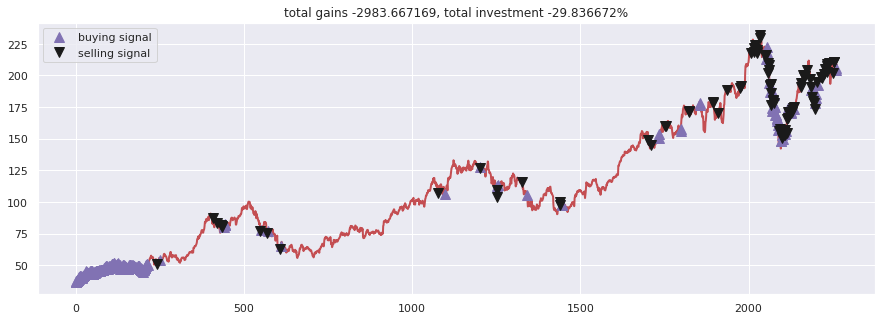

In [42]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Duel Q-learning agent

In [43]:
from collections import deque
import random

df= df_full.copy()
name = 'Duel Q-learning agent'

class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []

        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999

        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 512, activation = tf.nn.relu)
        tensor_action, tensor_validation = tf.split(feed,2,1)
        feed_action = tf.layers.dense(tensor_action, self.action_size)
        feed_validation = tf.layers.dense(tensor_validation, 1)
        self.logits = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())

    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [44]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 8065.058754.3, cost: 0.276840, total money: 3687.718745
epoch: 20, total rewards: 6709.605828.3, cost: 0.167915, total money: 6513.885843
epoch: 30, total rewards: 6149.701557.3, cost: 0.135081, total money: 9489.701572
epoch: 40, total rewards: 5922.480079.3, cost: 0.100186, total money: 9657.960090
epoch: 50, total rewards: 4219.501517.3, cost: 0.139111, total money: 12192.611533
epoch: 60, total rewards: 2957.130111.3, cost: 0.129392, total money: 12957.130111
epoch: 70, total rewards: 2750.411534.3, cost: 0.112370, total money: 12750.411534
epoch: 80, total rewards: 2433.320021.3, cost: 0.096610, total money: 12433.320021
epoch: 90, total rewards: 3059.020096.3, cost: 0.094591, total money: 13059.020096
epoch: 100, total rewards: 3023.837204.3, cost: 0.069964, total money: 12220.287217
epoch: 110, total rewards: 2955.464378.3, cost: 0.069301, total money: 12752.034385
epoch: 120, total rewards: 3443.961494.3, cost: 0.066280, total money: 13041.491508
epoch

In [45]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 3: buy 1 unit at price 37.581429, total balance 9962.418571
day 4, sell 1 unit at price 37.630001, investment 0.129245 %, total balance 10000.048572,
day 6: buy 1 unit at price 38.294285, total balance 9961.754287
day 7, sell 1 unit at price 38.602856, investment 0.805789 %, total balance 10000.357143,
day 8: buy 1 unit at price 39.509998, total balance 9960.847145
day 9: buy 1 unit at price 39.338570, total balance 9921.508575
day 10: buy 1 unit at price 40.461430, total balance 9881.047145
day 11: buy 1 unit at price 40.538570, total balance 9840.508575
day 12: buy 1 unit at price 41.107143, total balance 9799.401432
day 13: buy 1 unit at price 41.274284, total balance 9758.127148
day 14: buy 1 unit at price 41.759998, total balance 9716.367150
day 15: buy 1 unit at price 41.594284, total balance 9674.772866
day 17, sell 1 unit at price 41.052856, investment 3.904981 %, total balance 9715.825722,
day 18: buy 1 unit at price 40.535713, total balance 9675.290009
day 20: buy 1 unit 

day 557: buy 1 unit at price 80.129997, total balance 9428.087232
day 558, sell 1 unit at price 80.242859, investment -11.407975 %, total balance 9508.330091,
day 559: buy 1 unit at price 81.642860, total balance 9426.687231
day 561: buy 1 unit at price 83.540001, total balance 9343.147230
day 562: buy 1 unit at price 83.277145, total balance 9259.870085
day 563: buy 1 unit at price 84.194283, total balance 9175.675802
day 565: buy 1 unit at price 83.741432, total balance 9091.934370
day 566, sell 1 unit at price 82.264282, investment -6.115498 %, total balance 9174.198652,
day 567: buy 1 unit at price 76.970001, total balance 9097.228651
day 568: buy 1 unit at price 78.177139, total balance 9019.051512
day 569: buy 1 unit at price 76.178574, total balance 8942.872938
day 570: buy 1 unit at price 75.688568, total balance 8867.184370
day 571: buy 1 unit at price 77.341431, total balance 8789.842939
day 572, sell 1 unit at price 77.000000, investment -11.572659 %, total balance 8866.8429

day 1123: buy 1 unit at price 133.000000, total balance 9658.288647
day 1124: buy 1 unit at price 132.169998, total balance 9526.118649
day 1125, sell 1 unit at price 128.789993, investment 3.131003 %, total balance 9654.908642,
day 1126, sell 1 unit at price 130.419998, investment 3.131424 %, total balance 9785.328640,
day 1127: buy 1 unit at price 128.460007, total balance 9656.868633
day 1128: buy 1 unit at price 129.089996, total balance 9527.778637
day 1129, sell 1 unit at price 129.360001, investment 1.794145 %, total balance 9657.138638,
day 1130: buy 1 unit at price 128.539993, total balance 9528.598645
day 1131, sell 1 unit at price 126.410004, investment -1.110849 %, total balance 9655.008649,
day 1132, sell 1 unit at price 126.599998, investment -1.646988 %, total balance 9781.608647,
day 1134, sell 1 unit at price 124.510002, investment -6.383457 %, total balance 9906.118649,
day 1135, sell 1 unit at price 122.239998, investment -7.513051 %, total balance 10028.358647,
day 

day 1698, sell 1 unit at price 153.929993, investment -1.136804 %, total balance 9207.928801,
day 1699: buy 1 unit at price 154.449997, total balance 9053.478804
day 1700, sell 1 unit at price 155.369995, investment -0.064325 %, total balance 9208.848799,
day 1701, sell 1 unit at price 154.990005, investment 1.606144 %, total balance 9363.838804,
day 1702, sell 1 unit at price 148.979996, investment -2.665623 %, total balance 9512.818800,
day 1703, sell 1 unit at price 145.419998, investment -5.565301 %, total balance 9658.238798,
day 1704, sell 1 unit at price 146.589996, investment -4.687911 %, total balance 9804.828794,
day 1706: buy 1 unit at price 144.289993, total balance 9660.538801
day 1707: buy 1 unit at price 142.270004, total balance 9518.268797
day 1708: buy 1 unit at price 146.339996, total balance 9371.928801
day 1709, sell 1 unit at price 145.009995, investment -5.432373 %, total balance 9516.938796,
day 1710, sell 1 unit at price 145.869995, investment -5.199194 %, tota

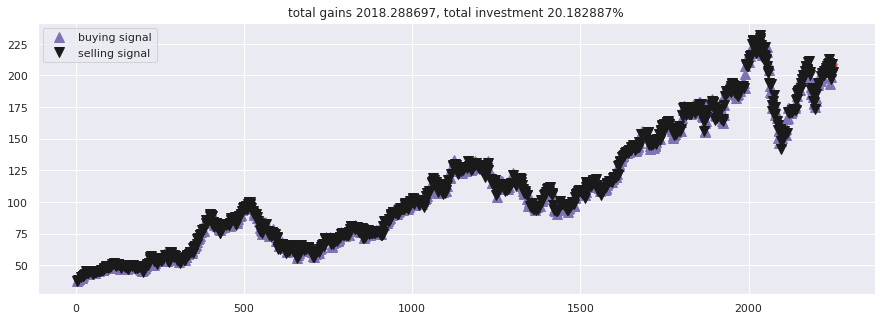

In [46]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Double Duel Q-learning agent

In [56]:
from collections import deque
import random

df= df_full.copy()
name = 'Double Duel Q-learning agent'

class Model:
    def __init__(self, input_size, output_size, layer_size, learning_rate):
        self.X = tf.placeholder(tf.float32, (None, input_size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        feed = tf.layers.dense(self.X, layer_size, activation = tf.nn.relu)
        tensor_action, tensor_validation = tf.split(feed,2,1)
        feed_action = tf.layers.dense(tensor_action, output_size)
        feed_validation = tf.layers.dense(tensor_validation, 1)
        self.logits = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 500
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.model = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.model_negative = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
        self.trainable = tf.trainable_variables()
    
    def _assign(self):
        for i in range(len(self.trainable)//2):
            assign_op = self.trainable[i+len(self.trainable)//2].assign(self.trainable[i])
            self.sess.run(assign_op)

    def _memorize(self, state, action, reward, new_state, done):
        self.MEMORIES.append((state, action, reward, new_state, done))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.predict(states)
        Q_new = self.predict(new_states)
        Q_new_negative = self.sess.run(self.model_negative.logits, feed_dict={self.model_negative.X:new_states})
        replay_size = len(replay)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, done_r = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not done_r:
                target[action_r] += self.GAMMA * Q_new_negative[i, np.argmax(Q_new[i])]
            X[i] = state_r
            Y[i] = target
        return X, Y

    def predict(self, inputs):
        return self.sess.run(self.model.logits, feed_dict={self.model.X:inputs})
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign()
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                state = next_state
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.model.cost, self.model.optimizer], 
                                        feed_dict={self.model.X: X, self.model.Y:Y})
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [48]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 649.862886.3, cost: 0.149098, total money: 8377.732882
epoch: 20, total rewards: 2824.799884.3, cost: 0.183652, total money: 10154.459873
epoch: 30, total rewards: 742.248672.3, cost: 0.042173, total money: 9913.668671
epoch: 40, total rewards: 626.471444.3, cost: 0.143114, total money: 10213.301445
epoch: 50, total rewards: 67.290053.3, cost: 0.031185, total money: 9858.280058
epoch: 60, total rewards: 235.932886.3, cost: 0.020735, total money: 10026.922891
epoch: 70, total rewards: 798.292770.3, cost: 0.013655, total money: 10798.292770
epoch: 80, total rewards: 453.892919.3, cost: 0.004260, total money: 10453.892919
epoch: 90, total rewards: 150.705807.3, cost: 0.032613, total money: 9945.175808
epoch: 100, total rewards: 138.734310.3, cost: 0.004181, total money: 10138.734310
epoch: 110, total rewards: 55.432725.3, cost: 0.018226, total money: 9846.422730
epoch: 120, total rewards: 138.157009.3, cost: 0.008541, total money: 10138.157009
epoch: 130, total r

In [49]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 1: buy 1 unit at price 36.830002, total balance 9963.169998
day 3: buy 1 unit at price 37.581429, total balance 9925.588569
day 12, sell 1 unit at price 41.107143, investment 11.613198 %, total balance 9966.695712,
day 13: buy 1 unit at price 41.274284, total balance 9925.421428
day 20: buy 1 unit at price 39.805714, total balance 9885.615714
day 23, sell 1 unit at price 41.317142, investment 9.940317 %, total balance 9926.932856,
day 25, sell 1 unit at price 42.194286, investment 2.228996 %, total balance 9969.127142,
day 29, sell 1 unit at price 44.962856, investment 12.955783 %, total balance 10014.089998,
day 47: buy 1 unit at price 45.432858, total balance 9968.657140
day 48: buy 1 unit at price 45.235714, total balance 9923.421426
day 51, sell 1 unit at price 43.084286, investment -5.169325 %, total balance 9966.505712,
day 52, sell 1 unit at price 42.928570, investment -5.100271 %, total balance 10009.434282,
day 58: buy 1 unit at price 45.000000, total balance 9964.434282
d

day 998, sell 1 unit at price 101.320000, investment 12.044231 %, total balance 9481.998566,
day 1000: buy 1 unit at price 100.889999, total balance 9381.108567
day 1001, sell 1 unit at price 102.129997, investment 12.135708 %, total balance 9483.238564,
day 1003: buy 1 unit at price 102.500000, total balance 9380.738564
day 1005, sell 1 unit at price 98.940002, investment 5.592321 %, total balance 9479.678566,
day 1009: buy 1 unit at price 97.989998, total balance 9381.688568
day 1010, sell 1 unit at price 101.000000, investment 7.607073 %, total balance 9482.688568,
day 1012: buy 1 unit at price 101.660004, total balance 9381.028564
day 1031: buy 1 unit at price 101.019997, total balance 9280.008567
day 1035, sell 1 unit at price 97.540001, investment 4.298550 %, total balance 9377.548568,
day 1041: buy 1 unit at price 104.830002, total balance 9272.718566
day 1046, sell 1 unit at price 106.980003, investment 12.232483 %, total balance 9379.698569,
day 1050: buy 1 unit at price 108.8

day 1915: buy 1 unit at price 175.820007, total balance 7820.618607
day 1916, sell 1 unit at price 178.240005, investment 23.623258 %, total balance 7998.858612,
day 1922: buy 1 unit at price 163.649994, total balance 7835.208618
day 1929: buy 1 unit at price 183.830002, total balance 7651.378616
day 1931, sell 1 unit at price 186.050003, investment 23.967218 %, total balance 7837.428619,
day 1932: buy 1 unit at price 187.360001, total balance 7650.068618
day 1935: buy 1 unit at price 188.149994, total balance 7461.918624
day 1936, sell 1 unit at price 186.440002, investment 22.585316 %, total balance 7648.358626,
day 1940, sell 1 unit at price 187.630005, investment 26.154784 %, total balance 7835.988631,
day 1943: buy 1 unit at price 188.149994, total balance 7647.838637
day 1946: buy 1 unit at price 187.500000, total balance 7460.338637
day 1947, sell 1 unit at price 186.869995, investment 16.025082 %, total balance 7647.208632,
day 1952: buy 1 unit at price 193.460007, total balanc

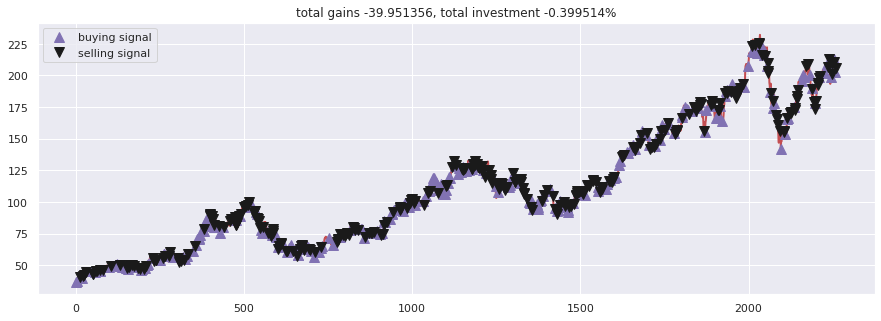

In [52]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

## Duel Recurrent Q-learning agent

In [57]:
from collections import deque
import random

df= df_full.copy()
name = 'Duel Recurrent Q-learning agent'
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.X = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.OUTPUT_SIZE))
        cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
        self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * self.LAYER_SIZE))
        self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
        tensor_action, tensor_validation = tf.split(self.rnn[:,-1],2,1)
        feed_action = tf.layers.dense(tensor_action, self.OUTPUT_SIZE)
        feed_validation = tf.layers.dense(tensor_validation, 1)
        self.logits = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.logits, feed_dict={self.X:states, self.hidden_layer:init_values})
        Q_new = self.sess.run(self.logits, feed_dict={self.X:new_states, self.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * np.amax(Q_new[i])
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.logits,self.last_state],
                                                feed_dict={self.X:[self.INITIAL_FEATURES],
                                                            self.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.cost, self.optimizer], 
                                        feed_dict={self.X: X, self.Y:Y,
                                                  self.hidden_layer: INIT_VAL})
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
                
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [58]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 3078.428615.3, cost: 4.798238, total money: 9987.308606
epoch: 20, total rewards: 197.259949.3, cost: 0.983709, total money: 5322.989946
epoch: 30, total rewards: 1085.817208.3, cost: 114.600891, total money: 10881.657204
epoch: 40, total rewards: 417.104122.3, cost: 16.339651, total money: 9796.074123
epoch: 50, total rewards: 696.882887.3, cost: 1.398470, total money: 4707.532883
epoch: 60, total rewards: 9868.912925.3, cost: 1.093343, total money: 1654.272901
epoch: 70, total rewards: 4675.001545.3, cost: 31.057550, total money: 14675.001545
epoch: 80, total rewards: 5557.144217.3, cost: 1.926100, total money: 8665.114160
epoch: 90, total rewards: 1034.078667.3, cost: 15.738458, total money: 7097.148645
epoch: 100, total rewards: 9046.128631.3, cost: 16.379368, total money: 1747.018632
epoch: 110, total rewards: 171.818486.3, cost: 0.728588, total money: 9552.158482
epoch: 120, total rewards: 886.224202.3, cost: 8.379243, total money: 2706.544181
epoch: 130

In [59]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 2073: buy 1 unit at price 180.940002, total balance 9819.059998
day 2075, sell 1 unit at price 178.580002, investment -1.304300 %, total balance 9997.640000,
day 2079: buy 1 unit at price 168.490005, total balance 9829.149995
day 2082, sell 1 unit at price 169.100006, investment 0.362040 %, total balance 9998.250001,
day 2097: buy 1 unit at price 148.259995, total balance 9849.990006
day 2098, sell 1 unit at price 147.929993, investment -0.222583 %, total balance 9997.919999,
day 2107: buy 1 unit at price 156.820007, total balance 9841.099992
day 2108, sell 1 unit at price 153.300003, investment -2.244614 %, total balance 9994.399995,


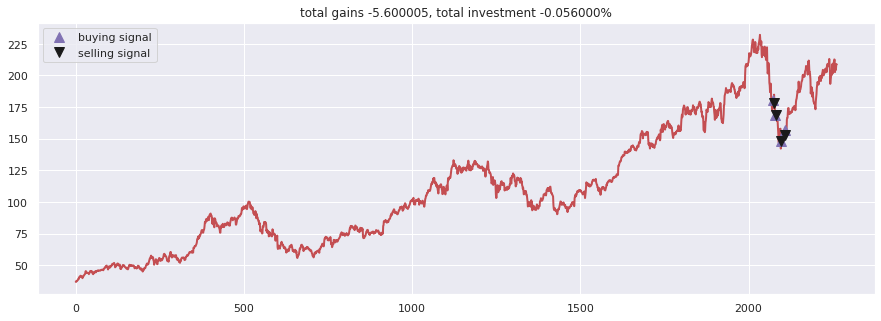

In [60]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

## Double Duel Recurrent Q-learning agent

In [61]:
from collections import deque
import random

df= df_full.copy()
name = 'Double Duel Recurrent Q-learning agent'

class Model:
    def __init__(self, input_size, output_size, layer_size, learning_rate, name):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            cell = tf.nn.rnn_cell.LSTMCell(layer_size, state_is_tuple = False)
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * layer_size))
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            tensor_action, tensor_validation = tf.split(self.rnn[:,-1],2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            self.logits = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.model = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE,
                           'real_model')
        self.model_negative = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE,
                                   'negative_model')
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
        self.trainable = tf.trainable_variables()
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)

    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.model.logits, feed_dict={self.model.X:states, 
                                                   self.model.hidden_layer:init_values})
        Q_new = self.sess.run(self.model.logits, feed_dict={self.model.X:new_states, 
                                                       self.model.hidden_layer:init_values})
        Q_new_negative = self.sess.run(self.model_negative.logits, 
                                  feed_dict={self.model_negative.X:new_states, 
                                             self.model_negative.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * Q_new_negative[i, np.argmax(Q_new[i])]
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.model.logits,self.model.last_state],
                                                feed_dict={self.model.X:[self.INITIAL_FEATURES],
                                                            self.model.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('real_model', 'negative_model')
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.model.logits,
                                                  self.model.last_state],
                                                  feed_dict={self.model.X:[self.INITIAL_FEATURES],
                                                             self.model.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.model.cost, self.model.optimizer], 
                                        feed_dict={self.model.X: X, self.model.Y:Y,
                                                  self.model.hidden_layer: INIT_VAL})
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [62]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 1811.447122.3, cost: 0.006586, total money: 11196.087122
epoch: 20, total rewards: 2341.952864.3, cost: 0.040287, total money: 11931.292860
epoch: 30, total rewards: 363.208431.3, cost: 0.004287, total money: 8713.518413
epoch: 40, total rewards: 1102.237061.3, cost: 0.020413, total money: 11102.237061
epoch: 50, total rewards: 4709.822836.3, cost: 0.029441, total money: 6364.222831
epoch: 60, total rewards: 880.313111.3, cost: 0.034711, total money: 1298.263048
epoch: 70, total rewards: 737.565772.3, cost: 0.098528, total money: 10532.035773
epoch: 80, total rewards: 1891.257341.3, cost: 0.203077, total money: 11891.257341
epoch: 90, total rewards: 73.020054.3, cost: 0.359966, total money: 10073.020054
epoch: 100, total rewards: 24.088383.3, cost: 0.095693, total money: 9613.438374
epoch: 110, total rewards: 3116.540111.3, cost: 0.114942, total money: 12299.870113
epoch: 120, total rewards: 834.951489.3, cost: 0.297846, total money: 230.221493
epoch: 130, tot

In [63]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 2057: buy 1 unit at price 201.589996, total balance 9798.410004
day 2059, sell 1 unit at price 209.949997, investment 4.147032 %, total balance 10008.360001,
day 2062: buy 1 unit at price 194.169998, total balance 9814.190003
day 2065, sell 1 unit at price 191.410004, investment -1.421432 %, total balance 10005.600007,
day 2069: buy 1 unit at price 176.779999, total balance 9828.820008
day 2072: buy 1 unit at price 174.240005, total balance 9654.580003
day 2073, sell 1 unit at price 180.940002, investment 2.353209 %, total balance 9835.520005,
day 2075, sell 1 unit at price 178.580002, investment 2.490815 %, total balance 10014.100007,
day 2094: buy 1 unit at price 157.740005, total balance 9856.360002
day 2096, sell 1 unit at price 142.190002, investment -9.857996 %, total balance 9998.550004,
day 2105: buy 1 unit at price 154.940002, total balance 9843.610002
day 2106: buy 1 unit at price 155.860001, total balance 9687.750001
day 2107, sell 1 unit at price 156.820007, investment 

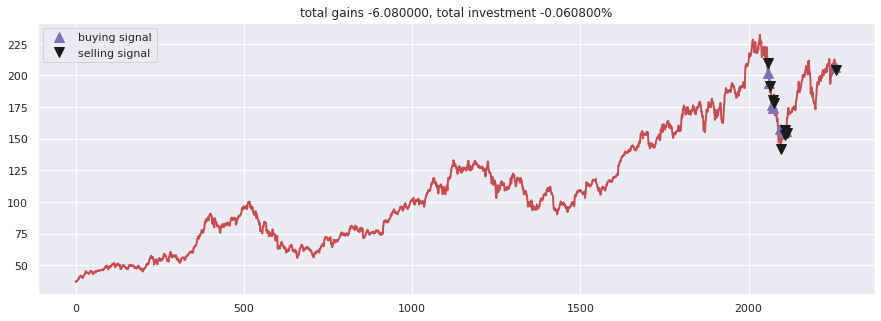

In [64]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Actor-critic agent

In [65]:
from collections import deque
import random

df= df_full.copy()
name = 'Actor-critic agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            feed_actor = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_actor, output_size)

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            feed_critic = tf.layers.dense(feed_critic, output_size, activation = tf.nn.relu) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead):
        self.MEMORIES.append((state, action, reward, new_state, dead))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target})
        for i in range(len(replay)):
            if not replay[0][-1]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                state = next_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [66]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 2414.510134.3, cost: 7968219822292992.000000, total money: 12002.490130
epoch: 20, total rewards: 4874.085641.3, cost: 107468652544.000000, total money: 1474.605575
epoch: 30, total rewards: 2066.471499.3, cost: 5229724041216.000000, total money: 10635.301502
epoch: 40, total rewards: 1670.168637.3, cost: 68225018626048000.000000, total money: 8074.098616
epoch: 50, total rewards: 2140.758661.3, cost: 3252588034029659357184.000000, total money: 10310.958674
epoch: 60, total rewards: 2496.142866.3, cost: 40358842990592.000000, total money: 6033.442855
epoch: 70, total rewards: 1362.985715.3, cost: 4312843472703731007488.000000, total money: 9902.565703
epoch: 80, total rewards: 3699.907225.3, cost: 83243235803136.000000, total money: 8210.367217
epoch: 90, total rewards: 3142.868571.3, cost: 586381783159799808.000000, total money: 6447.528592
epoch: 100, total rewards: 1368.742879.3, cost: nan, total money: 8635.612889
epoch: 110, total rewards: 2408.750032.3, 

In [67]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 4: buy 1 unit at price 37.630001, total balance 9962.369999
day 10: buy 1 unit at price 40.461430, total balance 9921.908569
day 12, sell 1 unit at price 41.107143, investment 9.240345 %, total balance 9963.015712,
day 19: buy 1 unit at price 40.360001, total balance 9922.655711
day 21: buy 1 unit at price 41.277142, total balance 9881.378569
day 23: buy 1 unit at price 41.317142, total balance 9840.061427
day 24, sell 1 unit at price 42.009998, investment 3.827270 %, total balance 9882.071425,
day 26: buy 1 unit at price 42.648571, total balance 9839.422854
day 31, sell 1 unit at price 44.212856, investment 9.546221 %, total balance 9883.635710,
day 38: buy 1 unit at price 43.605713, total balance 9840.029997
day 40: buy 1 unit at price 43.454285, total balance 9796.575712
day 45, sell 1 unit at price 45.517143, investment 10.272031 %, total balance 9842.092855,
day 46: buy 1 unit at price 45.154285, total balance 9796.938570
day 47: buy 1 unit at price 45.432858, total balance 97

day 1072: buy 1 unit at price 112.400002, total balance 9704.989948
day 1080, sell 1 unit at price 112.650002, investment 11.689471 %, total balance 9817.639950,
day 1085, sell 1 unit at price 113.989998, investment 11.985457 %, total balance 9931.629948,
day 1093, sell 1 unit at price 111.889999, investment 11.767054 %, total balance 10043.519947,
day 1094, sell 1 unit at price 112.010002, investment 12.936078 %, total balance 10155.529949,
day 1097: buy 1 unit at price 109.800003, total balance 10045.729946
day 1098: buy 1 unit at price 106.820000, total balance 9938.909946
day 1101, sell 1 unit at price 109.550003, investment 8.680555 %, total balance 10048.459949,
day 1102, sell 1 unit at price 112.400002, investment 13.822787 %, total balance 10160.859951,
day 1113, sell 1 unit at price 118.930000, investment 9.250412 %, total balance 10279.789951,
day 1114: buy 1 unit at price 119.720001, total balance 10160.069950
day 1115: buy 1 unit at price 122.019997, total balance 10038.049

day 2076, sell 1 unit at price 184.820007, investment -17.839516 %, total balance 9692.259995,
day 2087, sell 1 unit at price 160.889999, investment -29.082733 %, total balance 9853.149994,
day 2089: buy 1 unit at price 150.729996, total balance 9702.419998
day 2090: buy 1 unit at price 146.830002, total balance 9555.589996
day 2095, sell 1 unit at price 157.919998, investment -26.895660 %, total balance 9713.509994,
day 2098: buy 1 unit at price 147.929993, total balance 9565.580001
day 2099, sell 1 unit at price 150.750000, investment -31.261684 %, total balance 9716.330001,
day 2104, sell 1 unit at price 153.070007, investment -28.834437 %, total balance 9869.400008,
day 2110: buy 1 unit at price 152.699997, total balance 9716.700011
day 2115, sell 1 unit at price 166.440002, investment -21.579345 %, total balance 9883.140013,
day 2117: buy 1 unit at price 171.250000, total balance 9711.890013
day 2121: buy 1 unit at price 170.410004, total balance 9541.480009
day 2125, sell 1 unit 

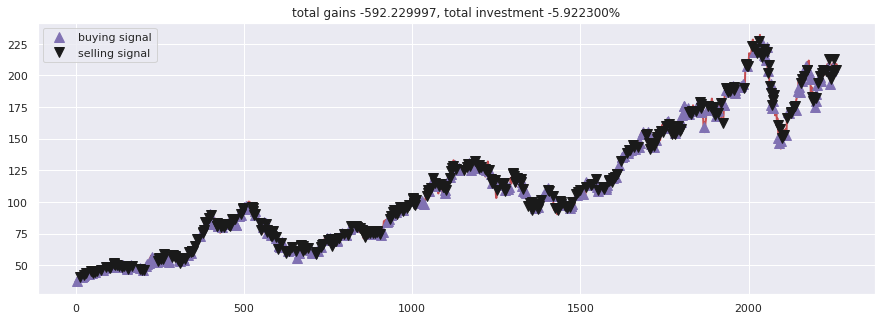

In [68]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Actor-critic Duel agent

In [69]:
from collections import deque
import random

df= df_full.copy()
name = 'Actor-critic Duel agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            feed_actor = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            tensor_action, tensor_validation = tf.split(feed_actor,2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            self.logits = feed_validation + tf.subtract(feed_action,
                                                        tf.reduce_mean(feed_action,axis=1,keep_dims=True))

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            tensor_action, tensor_validation = tf.split(feed_critic,2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            feed_critic = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            feed_critic = tf.nn.relu(feed_critic) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead):
        self.MEMORIES.append((state, action, reward, new_state, dead))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target})
        for i in range(len(replay)):
            if not replay[0][-1]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                state = next_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [70]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 3511.796968.3, cost: 9150.279297, total money: 982.856952
epoch: 20, total rewards: 6093.465755.3, cost: 1962155136.000000, total money: 6928.495756
epoch: 30, total rewards: 8751.668530.3, cost: 463886272.000000, total money: 609.228473
epoch: 40, total rewards: 15036.711472.3, cost: 28720272.000000, total money: 3975.801411
epoch: 50, total rewards: 13977.067091.3, cost: 96294032.000000, total money: 1500.177063
epoch: 60, total rewards: 17193.082882.3, cost: 647819.125000, total money: 209.842790
epoch: 70, total rewards: 18092.748501.3, cost: 2630665.000000, total money: 423.538461
epoch: 80, total rewards: 19099.829849.3, cost: 424131.812500, total money: 329.879780
epoch: 90, total rewards: 19483.161581.3, cost: 100479.609375, total money: 297.971570
epoch: 100, total rewards: 18888.165829.3, cost: 21410.644531, total money: 119.405734
epoch: 110, total rewards: 18178.467256.3, cost: 4907311.000000, total money: 256.597257
epoch: 120, total rewards: 1759

In [71]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 2: buy 1 unit at price 37.560001, total balance 9888.642853
day 3: buy 1 unit at price 37.581429, total balance 9851.061424
day 4: buy 1 unit at price 37.630001, total balance 9813.431423
day 5: buy 1 unit at price 38.148571, total balance 9775.282852
day 8: buy 1 unit at price 39.509998, total balance 9735.772854
day 9, sell 1 unit at price 39.338570, investment 6.414956 %, total balance 9775.111424,
day 11: buy 1 unit at price 40.538570, total balance 9734.572854
day 13: buy 1 unit at price 41.274284, total balance 9693.298570
day 15: buy 1 unit at price 41.594284, total balance 9651.704286
day 16: buy 1 unit at price 40.980000, total balance 9610.724286
day 18: buy 1 unit at price 40.535713, total balance 9570.188573
day 19, sell 1 unit at price 40.360001, investment 9.584575 %, total balance 9610.548574,
day 20: buy 1 unit at price 39.805714, total bal

day 917, sell 1 unit at price 84.618568, investment 72.469705 %, total balance 105.824296,
day 918: buy 1 unit at price 84.298569, total balance 21.525727
day 920, sell 1 unit at price 84.654289, investment 78.359029 %, total balance 106.180016,
day 921: buy 1 unit at price 85.851425, total balance 20.328591
day 924, sell 1 unit at price 83.998573, investment 77.377908 %, total balance 104.327164,
day 925: buy 1 unit at price 83.648575, total balance 20.678589
day 928, sell 1 unit at price 84.838570, investment 81.834044 %, total balance 105.517159,
day 929: buy 1 unit at price 84.117142, total balance 21.400017
day 935, sell 1 unit at price 87.732857, investment 84.734089 %, total balance 109.132874,
day 936: buy 1 unit at price 89.375717, total balance 19.757157
day 954, sell 1 unit at price 90.910004, investment 95.709820 %, total balance 110.667161,
day 955, sell 1 unit at price 90.830002, investment 95.453434 %, total balance 201.497163,
day 956, sell 1 unit at price 90.279999, in

day 1878, sell 1 unit at price 171.070007, investment 124.291068 %, total balance 238.767174,
day 1881: buy 1 unit at price 178.970001, total balance 59.797173
day 1882, sell 1 unit at price 178.389999, investment 143.417157 %, total balance 238.187172,
day 1883, sell 1 unit at price 178.119995, investment 141.121632 %, total balance 416.307167,
day 1884, sell 1 unit at price 175.000000, investment 142.684784 %, total balance 591.307167,
day 1886: buy 1 unit at price 176.820007, total balance 414.487160
day 1887: buy 1 unit at price 176.669998, total balance 237.817162
day 1890: buy 1 unit at price 179.979996, total balance 57.837166
day 1910, sell 1 unit at price 170.050003, investment 154.402655 %, total balance 227.887169,
day 1912: buy 1 unit at price 172.440002, total balance 55.447167
day 1915, sell 1 unit at price 175.820007, investment 167.557989 %, total balance 231.267174,
day 1916: buy 1 unit at price 178.240005, total balance 53.027169
day 1927, sell 1 unit at price 176.570

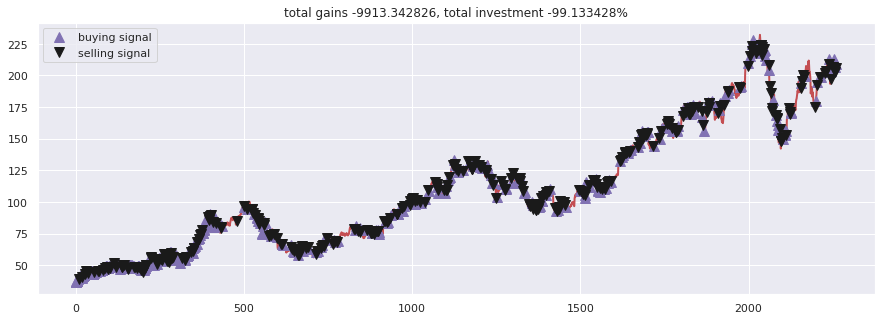

In [72]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

## Actor-critic Recurrent agent

In [73]:
from collections import deque
import random

df= df_full.copy()
name = 'Actor-critic Recurrent agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * size_layer))
            cell = tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X, cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            self.logits = tf.layers.dense(self.rnn[:,-1], output_size)

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * size_layer))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            cell = tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X, cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            feed_critic = tf.layers.dense(self.rnn[:,-1], output_size, activation = tf.nn.relu) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states,
                                                       self.actor.hidden_layer: init_values})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states,
                                                                     self.actor_target.hidden_layer: init_values})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q,
                                                          self.critic.hidden_layer: init_values})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads,
                                                self.actor.hidden_layer: init_values})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target,
                                                 self.critic_target.hidden_layer: init_values})
        for i in range(len(replay)):
            if not replay[0][-2]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards,
                                          self.critic.hidden_layer: init_values})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            
            if np.random.rand() < self.EPSILON:
                action = np.random.randint(self.OUTPUT_SIZE)
            else:
                action, last_state = self.sess.run([self.actor.logits,
                                                  self.actor.last_state],
                                                  feed_dict={self.actor.X:[self.INITIAL_FEATURES],
                                                             self.actor.hidden_layer:init_value})
                action, init_value = np.argmax(action[0]), last_state
                    
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                    
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.actor.logits,
                                                  self.actor.last_state],
                                                  feed_dict={self.actor.X:[self.INITIAL_FEATURES],
                                                             self.actor.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                self.INITIAL_FEATURES = new_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [74]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 3901.321623.3, cost: 0.143783, total money: 10075.291611
epoch: 20, total rewards: 1037.068529.3, cost: 108.886093, total money: 10627.938525
epoch: 30, total rewards: 3289.928665.3, cost: 0.005776, total money: 8607.098633
epoch: 40, total rewards: 8673.115488.3, cost: 0.271829, total money: 880.305490
epoch: 50, total rewards: 15275.687119.3, cost: 0.081627, total money: 368.047029
epoch: 60, total rewards: 17901.390099.3, cost: 0.001066, total money: 330.610029
epoch: 70, total rewards: 18819.568577.3, cost: 0.002437, total money: 807.508569
epoch: 80, total rewards: 15748.859918.3, cost: 0.000745, total money: 200.549880
epoch: 90, total rewards: 17704.545677.3, cost: 0.000418, total money: 387.775640
epoch: 100, total rewards: 18550.146018.3, cost: 0.000742, total money: 516.056034
epoch: 110, total rewards: 18074.375795.3, cost: 0.000587, total money: 1079.675795
epoch: 120, total rewards: 17344.320009.3, cost: 0.000535, total money: 135.210009
epoch: 13

In [75]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 2: buy 1 unit at price 37.560001, total balance 9888.642853
day 3: buy 1 unit at price 37.581429, total balance 9851.061424
day 4, sell 1 unit at price 37.630001, investment 1.793098 %, total balance 9888.691425,
day 5: buy 1 unit at price 38.148571, total balance 9850.542854
day 6: buy 1 unit at price 38.294285, total balance 9812.248569
day 7: buy 1 unit at price 38.602856, total balance 9773.645713
day 8: buy 1 unit at price 39.509998, total balance 9734.135715
day 9: buy 1 unit at price 39.338570, total balance 9694.797145
day 10: buy 1 unit at price 40.461430, total balance 9654.335715
day 11: buy 1 unit at price 40.538570, total balance 9613.797145
day 12: buy 1 unit at price 41.107143, total balance 9572.690002
day 13: buy 1 unit at price 41.274284, total balance 9531.415718
day 15, sell 1 unit at price 41.594284, investment 12.935872 %, total balan

day 266: buy 1 unit at price 57.757141, total balance 2401.885722
day 267: buy 1 unit at price 57.595715, total balance 2344.290007
day 268: buy 1 unit at price 57.037144, total balance 2287.252863
day 269: buy 1 unit at price 56.715714, total balance 2230.537149
day 270: buy 1 unit at price 55.795715, total balance 2174.741434
day 271: buy 1 unit at price 54.474285, total balance 2120.267149
day 272, sell 1 unit at price 53.514286, investment 17.569519 %, total balance 2173.781435,
day 273, sell 1 unit at price 53.214287, investment 17.849916 %, total balance 2226.995722,
day 274: buy 1 unit at price 54.035713, total balance 2172.960009
day 276: buy 1 unit at price 52.828571, total balance 2120.131438
day 277, sell 1 unit at price 55.544285, investment 22.255758 %, total balance 2175.675723,
day 278: buy 1 unit at price 57.184284, total balance 2118.491439
day 279, sell 1 unit at price 57.455715, investment 30.568458 %, total balance 2175.947154,
day 281: buy 1 unit at price 60.285713

day 538, sell 1 unit at price 90.575714, investment 84.139751 %, total balance 109.578602,
day 539: buy 1 unit at price 87.622856, total balance 21.955746
day 543, sell 1 unit at price 85.045715, investment 67.913355 %, total balance 107.001461,
day 544: buy 1 unit at price 85.220001, total balance 21.781460
day 546, sell 1 unit at price 83.517143, investment 62.765189 %, total balance 105.298603,
day 547: buy 1 unit at price 83.264282, total balance 22.034321
day 552, sell 1 unit at price 77.557144, investment 50.847453 %, total balance 99.591465,
day 553: buy 1 unit at price 76.697144, total balance 22.894321
day 559, sell 1 unit at price 81.642860, investment 63.024874 %, total balance 104.537181,
day 560: buy 1 unit at price 84.218575, total balance 20.318606
day 575, sell 1 unit at price 74.118568, investment 53.223469 %, total balance 94.437174,
day 576: buy 1 unit at price 76.271431, total balance 18.165743
day 581, sell 1 unit at price 73.285713, investment 49.728564 %, total b

day 856: buy 1 unit at price 71.397141, total balance 307.182882
day 858, sell 1 unit at price 71.647141, investment 51.045056 %, total balance 378.830023,
day 859, sell 1 unit at price 72.684288, investment 53.485785 %, total balance 451.514311,
day 860: buy 1 unit at price 73.227142, total balance 378.287169
day 861, sell 1 unit at price 73.215714, investment 57.259891 %, total balance 451.502883,
day 862, sell 1 unit at price 74.239998, investment 56.322943 %, total balance 525.742881,
day 863: buy 1 unit at price 75.570000, total balance 450.172881
day 864: buy 1 unit at price 76.565712, total balance 373.607169
day 865: buy 1 unit at price 76.559998, total balance 297.047171
day 866: buy 1 unit at price 77.775711, total balance 219.271460
day 868, sell 1 unit at price 77.998573, investment 67.097178 %, total balance 297.270033,
day 869, sell 1 unit at price 76.767143, investment 70.420523 %, total balance 374.037176,
day 870: buy 1 unit at price 75.878571, total balance 298.158605

day 1497: buy 1 unit at price 109.379997, total balance 52.978599
day 1500, sell 1 unit at price 109.360001, investment 102.835116 %, total balance 162.338600,
day 1501: buy 1 unit at price 108.510002, total balance 53.828598
day 1502, sell 1 unit at price 108.849998, investment 106.484916 %, total balance 162.678596,
day 1503, sell 1 unit at price 108.029999, investment 100.847249 %, total balance 270.708595,
day 1504: buy 1 unit at price 107.570000, total balance 163.138595
day 1505: buy 1 unit at price 106.940002, total balance 56.198593
day 1513, sell 1 unit at price 105.519997, investment 101.269783 %, total balance 161.718590,
day 1514: buy 1 unit at price 103.129997, total balance 58.588593
day 1515, sell 1 unit at price 105.440002, investment 103.009051 %, total balance 164.028595,
day 1517: buy 1 unit at price 111.769997, total balance 52.258598
day 1521, sell 1 unit at price 113.570000, investment 111.366048 %, total balance 165.828598,
day 1522: buy 1 unit at price 113.55000

day 2130, sell 1 unit at price 172.970001, investment 161.769802 %, total balance 261.588606,
day 2131: buy 1 unit at price 174.229996, total balance 87.358610
day 2135, sell 1 unit at price 174.970001, investment 169.510414 %, total balance 262.328611,
day 2136: buy 1 unit at price 175.850006, total balance 86.478605
day 2154, sell 1 unit at price 188.720001, investment 169.836810 %, total balance 275.198606,
day 2155: buy 1 unit at price 189.949997, total balance 85.248609
day 2156, sell 1 unit at price 191.240005, investment 168.541627 %, total balance 276.488614,
day 2159: buy 1 unit at price 195.690002, total balance 80.798612
day 2160, sell 1 unit at price 197.000000, investment 174.504329 %, total balance 277.798612,
day 2161: buy 1 unit at price 200.100006, total balance 77.698606
day 2162, sell 1 unit at price 199.500000, investment 177.650747 %, total balance 277.198606,
day 2163: buy 1 unit at price 200.619995, total balance 76.578611
day 2164, sell 1 unit at price 198.94999

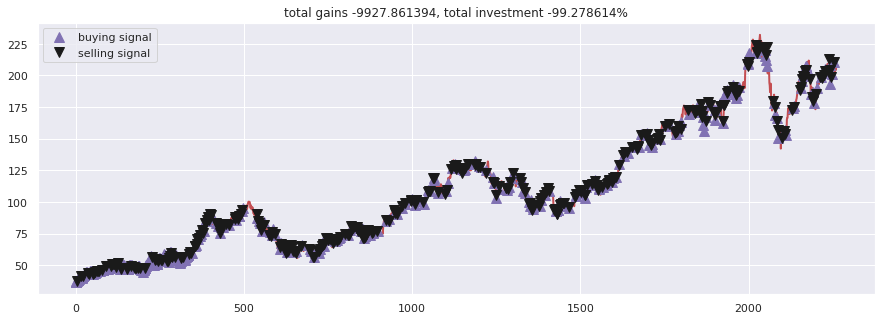

In [76]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Actor-critic Duel Recurrent agent

In [77]:
from collections import deque
import random

df= df_full.copy()
name = 'Actor-critic Duel Recurrent agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * size_layer))
            cell = tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X, cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            tensor_action, tensor_validation = tf.split(self.rnn[:,-1],2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            self.logits = feed_validation + tf.subtract(feed_action,
                                                        tf.reduce_mean(feed_action,axis=1,keep_dims=True))

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * size_layer))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            cell = tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)
            self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X, cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            tensor_action, tensor_validation = tf.split(self.rnn[:,-1],2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            feed_critic = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            feed_critic = tf.nn.relu(feed_critic) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states,
                                                       self.actor.hidden_layer: init_values})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states,
                                                                     self.actor_target.hidden_layer: init_values})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q,
                                                          self.critic.hidden_layer: init_values})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads,
                                                self.actor.hidden_layer: init_values})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target,
                                                 self.critic_target.hidden_layer: init_values})
        for i in range(len(replay)):
            if not replay[0][-2]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards,
                                          self.critic.hidden_layer: init_values})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            
            if np.random.rand() < self.EPSILON:
                action = np.random.randint(self.OUTPUT_SIZE)
            else:
                action, last_state = self.sess.run([self.actor.logits,
                                                  self.actor.last_state],
                                                  feed_dict={self.actor.X:[self.INITIAL_FEATURES],
                                                             self.actor.hidden_layer:init_value})
                action, init_value = np.argmax(action[0]), last_state
                    
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                    
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.actor.logits,
                                                  self.actor.last_state],
                                                  feed_dict={self.actor.X:[self.INITIAL_FEATURES],
                                                             self.actor.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                self.INITIAL_FEATURES = new_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [78]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 1745.741445.3, cost: 0.009209, total money: 10915.611440
epoch: 20, total rewards: 3125.262889.3, cost: 0.020494, total money: 12729.172893
epoch: 30, total rewards: 14922.267195.3, cost: 0.002018, total money: 909.667218
epoch: 40, total rewards: 1111.266983.3, cost: 0.001603, total money: 10490.636978
epoch: 50, total rewards: 1378.678443.3, cost: 0.000589, total money: 11169.668448
epoch: 60, total rewards: 2317.455670.3, cost: 0.001367, total money: 7096.695631
epoch: 70, total rewards: 2575.015643.3, cost: 0.006834, total money: 2624.665684
epoch: 80, total rewards: 13685.224255.3, cost: 0.000886, total money: 74.594279
epoch: 90, total rewards: 8558.472834.3, cost: 0.008458, total money: 9595.142835
epoch: 100, total rewards: 6343.652988.3, cost: 0.006501, total money: 6783.802983
epoch: 110, total rewards: 3534.640053.3, cost: 0.569906, total money: 6133.470041
epoch: 120, total rewards: 7672.611379.3, cost: 0.001867, total money: 175.191305
epoch: 130,

In [79]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 3, sell 1 unit at price 37.581429, investment 1.661705 %, total balance 9963.784283,
day 4, sell 1 unit at price 37.630001, investment 2.172139 %, total balance 10001.414284,
day 6: buy 1 unit at price 38.294285, total balance 9963.119999
day 7, sell 1 unit at price 38.602856, investment 0.805789 %, total balance 10001.722855,
day 28: buy 1 unit at price 43.187141, total balance 9958.535714
day 29, sell 1 unit at price 44.962856, investment 4.111675 %, total balance 10003.498570,
day 43: buy 1 unit at price 45.467144, total balance 9958.031426
day 45, sell 1 unit at price 45.517143, investment 0.109967 %, total balance 10003.548569,
day 48: buy 1 unit at price 45.235714, total balance 9958.312855
day 49, sell 1 unit at price 44.004284, investment -2.722252 %, total balance 10002.317139,
day 60: buy 1 unit at price 44.450001, total balance 9957.867138
day 6

day 527: buy 1 unit at price 93.227142, total balance 9923.807132
day 529: buy 1 unit at price 90.835716, total balance 9832.971416
day 530: buy 1 unit at price 91.558571, total balance 9741.412845
day 531: buy 1 unit at price 89.728569, total balance 9651.684276
day 532, sell 1 unit at price 89.958572, investment -3.506028 %, total balance 9741.642848,
day 533, sell 1 unit at price 90.680000, investment -0.171426 %, total balance 9832.322848,
day 537, sell 1 unit at price 87.120003, investment -4.847791 %, total balance 9919.442851,
day 538, sell 1 unit at price 90.575714, investment 0.944120 %, total balance 10010.018565,
day 554: buy 1 unit at price 75.088570, total balance 9934.929995
day 555, sell 1 unit at price 75.382858, investment 0.391921 %, total balance 10010.312853,
day 565: buy 1 unit at price 83.741432, total balance 9926.571421
day 566, sell 1 unit at price 82.264282, investment -1.763942 %, total balance 10008.835703,
day 571: buy 1 unit at price 77.341431, total balan

day 1049: buy 1 unit at price 108.599998, total balance 9902.414293
day 1050: buy 1 unit at price 108.860001, total balance 9793.554292
day 1051, sell 1 unit at price 108.699997, investment 0.092080 %, total balance 9902.254289,
day 1052: buy 1 unit at price 109.010002, total balance 9793.244287
day 1053, sell 1 unit at price 108.830002, investment -0.027557 %, total balance 9902.074289,
day 1055, sell 1 unit at price 111.250000, investment 2.054855 %, total balance 10013.324289,
day 1058: buy 1 unit at price 113.989998, total balance 9899.334291
day 1059: buy 1 unit at price 115.470001, total balance 9783.864290
day 1060: buy 1 unit at price 114.669998, total balance 9669.194292
day 1061, sell 1 unit at price 116.309998, investment 2.035266 %, total balance 9785.504290,
day 1063, sell 1 unit at price 118.629997, investment 2.736638 %, total balance 9904.134287,
day 1064, sell 1 unit at price 117.599998, investment 2.555158 %, total balance 10021.734285,
day 1067: buy 1 unit at price 1

day 1611: buy 1 unit at price 121.629997, total balance 9893.764237
day 1613: buy 1 unit at price 128.750000, total balance 9765.014237
day 1614, sell 1 unit at price 128.529999, investment 5.672944 %, total balance 9893.544236,
day 1615, sell 1 unit at price 129.080002, investment 0.256312 %, total balance 10022.624238,
day 1624: buy 1 unit at price 135.350006, total balance 9887.274232
day 1625, sell 1 unit at price 135.720001, investment 0.273362 %, total balance 10022.994233,
day 1626: buy 1 unit at price 136.699997, total balance 9886.294236
day 1627, sell 1 unit at price 137.110001, investment 0.299930 %, total balance 10023.404237,
day 1628: buy 1 unit at price 136.529999, total balance 9886.874238
day 1629, sell 1 unit at price 136.660004, investment 0.095221 %, total balance 10023.534242,
day 1633: buy 1 unit at price 138.960007, total balance 9884.574235
day 1634, sell 1 unit at price 139.779999, investment 0.590092 %, total balance 10024.354234,
day 1636: buy 1 unit at price

day 2160, sell 1 unit at price 197.000000, investment 0.669425 %, total balance 10058.884175,
day 2161: buy 1 unit at price 200.100006, total balance 9858.784169
day 2162, sell 1 unit at price 199.500000, investment -0.299853 %, total balance 10058.284169,
day 2164: buy 1 unit at price 198.949997, total balance 9859.334172
day 2165, sell 1 unit at price 198.869995, investment -0.040212 %, total balance 10058.204167,
day 2167: buy 1 unit at price 199.250000, total balance 9858.954167
day 2169, sell 1 unit at price 203.860001, investment 2.313677 %, total balance 10062.814168,
day 2172: buy 1 unit at price 207.160004, total balance 9855.654164
day 2173, sell 1 unit at price 205.279999, investment -0.907513 %, total balance 10060.934163,
day 2175: buy 1 unit at price 204.610001, total balance 9856.324162
day 2176, sell 1 unit at price 200.669998, investment -1.925616 %, total balance 10056.994160,
day 2183: buy 1 unit at price 200.720001, total balance 9856.274159
day 2184, sell 1 unit at

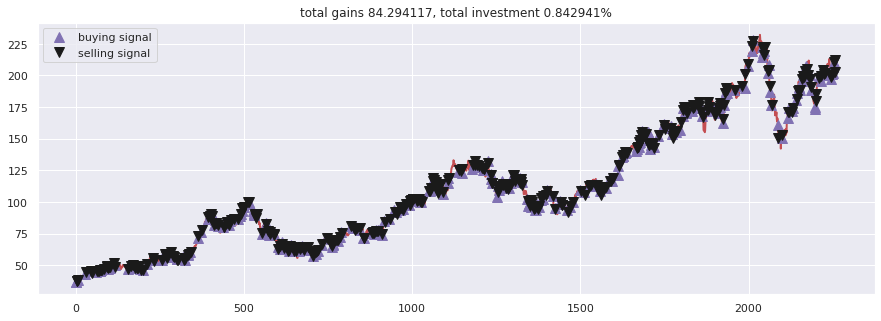

In [80]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Curiosity Q-learning agent

In [81]:
from collections import deque
import random


df= df_full.copy()
name = 'Curiosity Q-learning agent'

class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 500
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.state_size))
        self.ACTION = tf.placeholder(tf.float32, (None))
        self.REWARD = tf.placeholder(tf.float32, (None))
        self.batch_size = tf.shape(self.ACTION)[0]
        
        with tf.variable_scope('curiosity_model'):
            action = tf.reshape(self.ACTION, (-1,1))
            state_action = tf.concat([self.X, action], axis=1)
            save_state = tf.identity(self.Y)
            
            feed = tf.layers.dense(state_action, 32, activation=tf.nn.relu)
            self.curiosity_logits = tf.layers.dense(feed, self.state_size)
            self.curiosity_cost = tf.reduce_sum(tf.square(save_state - self.curiosity_logits), axis=1)
            
            self.curiosity_optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE)\
            .minimize(tf.reduce_mean(self.curiosity_cost))
        
        total_reward = tf.add(self.curiosity_cost, self.REWARD)
        
        with tf.variable_scope("q_model"):
            with tf.variable_scope("eval_net"):
                x_action = tf.layers.dense(self.X, 128, tf.nn.relu)
                self.logits = tf.layers.dense(x_action, self.OUTPUT_SIZE)
            
            with tf.variable_scope("target_net"):
                y_action = tf.layers.dense(self.Y, 128, tf.nn.relu)
                y_q = tf.layers.dense(y_action, self.OUTPUT_SIZE)
            
            q_target = total_reward + self.GAMMA * tf.reduce_max(y_q, axis=1)
            action = tf.cast(self.ACTION, tf.int32)
            action_indices = tf.stack([tf.range(self.batch_size, dtype=tf.int32), action], axis=1)
            q = tf.gather_nd(params=self.logits, indices=action_indices)
            self.cost = tf.losses.mean_squared_error(labels=q_target, predictions=q)
            self.optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE).minimize(
            self.cost, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "q_model/eval_net"))
            
        t_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/target_net')
        e_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/eval_net')
        self.target_replace_op = [tf.assign(t, e) for t, e in zip(t_params, e_params)]
        
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, done):
        self.MEMORIES.append((state, action, reward, new_state, done))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action
    
    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        actions = np.array([a[1] for a in replay])
        rewards = np.array([a[2] for a in replay])
        new_states = np.array([a[3] for a in replay])
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.target_replace_op)
            
        cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict = {
            self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards
        })
        
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.curiosity_optimizer, feed_dict = {
                self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards
            })
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                state = next_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [82]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch: 10, total rewards: 820.508620.3, cost: 181102.125000, total money: 10201.808622
epoch: 20, total rewards: 1797.756983.3, cost: 263580.062500, total money: 10364.596964
epoch: 30, total rewards: 1601.115768.3, cost: 696793.062500, total money: 7385.265777
epoch: 40, total rewards: 1737.042994.3, cost: 414766.000000, total money: 11531.512995
epoch: 50, total rewards: 1235.889811.3, cost: 5955180.000000, total money: 6603.829800
epoch: 60, total rewards: 1381.798603.3, cost: 1265381.625000, total money: 10761.758594
epoch: 70, total rewards: 9978.111492.3, cost: 423433.562500, total money: 1703.091428
epoch: 80, total rewards: 380.531444.3, cost: 341705.625000, total money: 9758.411448
epoch: 90, total rewards: 1204.035665.3, cost: 945276.250000, total money: 233.835698
ep

In [83]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1, sell 1 unit at price 36.830002, investment -0.370983 %, total balance 9999.862858,
day 10: buy 1 unit at price 40.461430, total balance 9959.401428
day 11, sell 1 unit at price 40.538570, investment 0.190651 %, total balance 9999.939998,
day 15: buy 1 unit at price 41.594284, total balance 9958.345714
day 16, sell 1 unit at price 40.980000, investment -1.476847 %, total balance 9999.325714,
day 19: buy 1 unit at price 40.360001, total balance 9958.965713
day 20, sell 1 unit at price 39.805714, investment -1.373357 %, total balance 9998.771427,
day 24: buy 1 unit at price 42.009998, total balance 9956.761429
day 26, sell 1 unit at price 42.648571, investment 1.520050 %, total balance 9999.410000,
day 34: buy 1 unit at price 43.924286, total balance 9955.485714
day 35, sell 1 unit at price 44.119999, investment 0.445569 %, total balance 9999.605713,
day 37: buy 1 unit at price 43.975716, total balance 9955.629997
day 

day 921: buy 1 unit at price 85.851425, total balance 9955.174334
day 922: buy 1 unit at price 84.915718, total balance 9870.258616
day 924, sell 1 unit at price 83.998573, investment -2.158208 %, total balance 9954.257189,
day 925, sell 1 unit at price 83.648575, investment -1.492236 %, total balance 10037.905764,
day 936: buy 1 unit at price 89.375717, total balance 9948.530047
day 937, sell 1 unit at price 89.144287, investment -0.258941 %, total balance 10037.674334,
day 943: buy 1 unit at price 92.478569, total balance 9945.195765
day 944, sell 1 unit at price 92.224289, investment -0.274961 %, total balance 10037.420054,
day 952: buy 1 unit at price 92.180000, total balance 9945.240054
day 953, sell 1 unit at price 91.860001, investment -0.347146 %, total balance 10037.100055,
day 957: buy 1 unit at price 90.360001, total balance 9946.740054
day 958: buy 1 unit at price 90.900002, total balance 9855.840052
day 959, sell 1 unit at price 91.980003, investment 1.792831 %, total bala

day 1867, sell 1 unit at price 156.490005, investment -6.729046 %, total balance 10123.560002,
day 1877: buy 1 unit at price 171.850006, total balance 9951.709996
day 1878, sell 1 unit at price 171.070007, investment -0.453884 %, total balance 10122.780003,
day 1879: buy 1 unit at price 172.500000, total balance 9950.280003
day 1880, sell 1 unit at price 175.500000, investment 1.739130 %, total balance 10125.780003,
day 1884: buy 1 unit at price 175.000000, total balance 9950.780003
day 1885: buy 1 unit at price 176.210007, total balance 9774.569996
day 1889, sell 1 unit at price 176.940002, investment 1.108573 %, total balance 9951.509998,
day 1890, sell 1 unit at price 179.979996, investment 2.139486 %, total balance 10131.489994,
day 1909: buy 1 unit at price 168.380005, total balance 9963.109989
day 1910, sell 1 unit at price 170.050003, investment 0.991803 %, total balance 10133.159992,
day 1912: buy 1 unit at price 172.440002, total balance 9960.719990
day 1913, sell 1 unit at pr

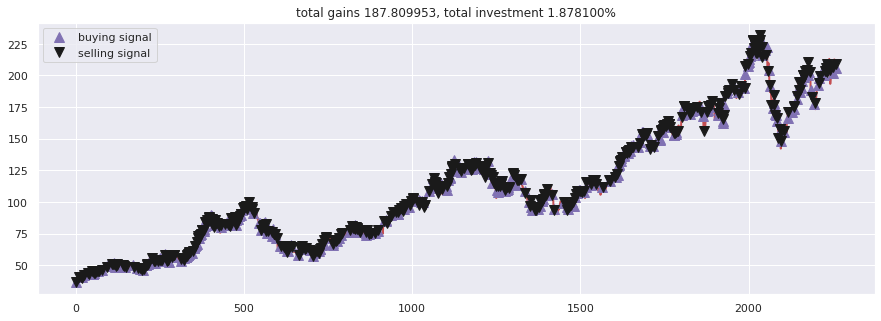

In [84]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Recurrent Curiosity Q-learning agent

In [85]:
from collections import deque
import random

df= df_full.copy()
name = 'Recurrent Curiosity Q-learning agent'

class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 128
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.X = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * self.LAYER_SIZE))
        self.ACTION = tf.placeholder(tf.float32, (None))
        self.REWARD = tf.placeholder(tf.float32, (None))
        self.batch_size = tf.shape(self.ACTION)[0]
        self.seq_len = tf.shape(self.X)[1]
        
        with tf.variable_scope('curiosity_model'):
            action = tf.reshape(self.ACTION, (-1,1,1))
            repeat_action = tf.tile(action, [1,self.seq_len,1])
            state_action = tf.concat([self.X, repeat_action], axis=-1)
            save_state = tf.identity(self.Y)
            cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
            self.rnn,last_state = tf.nn.dynamic_rnn(inputs=state_action,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
            self.curiosity_logits = tf.layers.dense(self.rnn[:,-1], self.state_size)
            self.curiosity_cost = tf.reduce_sum(tf.square(save_state[:,-1] - self.curiosity_logits), axis=1)
            
            self.curiosity_optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE)\
            .minimize(tf.reduce_mean(self.curiosity_cost))
        
        total_reward = tf.add(self.curiosity_cost, self.REWARD)
        
        with tf.variable_scope("q_model"):
            with tf.variable_scope("eval_net"):
                cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
                rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
                self.logits = tf.layers.dense(rnn[:,-1], self.OUTPUT_SIZE)
            
            with tf.variable_scope("target_net"):
                cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
                rnn,last_state = tf.nn.dynamic_rnn(inputs=self.Y,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
                y_q = tf.layers.dense(rnn[:,-1], self.OUTPUT_SIZE)
            
            q_target = total_reward + self.GAMMA * tf.reduce_max(y_q, axis=1)
            action = tf.cast(self.ACTION, tf.int32)
            action_indices = tf.stack([tf.range(self.batch_size, dtype=tf.int32), action], axis=1)
            q = tf.gather_nd(params=self.logits, indices=action_indices)
            self.cost = tf.losses.mean_squared_error(labels=q_target, predictions=q)
            self.optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE).minimize(
            self.cost, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "q_model/eval_net"))
            
        t_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/target_net')
        e_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/eval_net')
        self.target_replace_op = [tf.assign(t, e) for t, e in zip(t_params, e_params)]
        
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, done, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, done, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        actions = np.array([a[1] for a in replay])
        rewards = np.array([a[2] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.target_replace_op)
            
        cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict = {
            self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards,
            self.hidden_layer: init_values
        })
        
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.curiosity_optimizer, feed_dict = {
                self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards,
                self.hidden_layer: init_values
            })
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            
            if np.random.rand() < self.EPSILON:
                action = np.random.randint(self.OUTPUT_SIZE)
            else:
                action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                action, init_value = np.argmax(action[0]), last_state
                    
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [86]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 1353.790021.3, cost: 68644.125000, total money: 190.299985
epoch: 20, total rewards: 1834.845744.3, cost: 67565.789062, total money: 6573.735745
epoch: 30, total rewards: 7933.005784.3, cost: 37926.269531, total money: 2135.305834
epoch: 40, total rewards: 8853.595657.3, cost: 10591.539062, total money: 619.045609
epoch: 50, total rewards: 17308.297271.3, cost: 31207.605469, total money: 11.017183
epoch: 60, total rewards: 864.606989.3, cost: 4711.611816, total money: 10659.076990
epoch: 70, total rewards: 19367.933058.3, cost: 52853.167969, total money: 9660.593092
epoch: 80, total rewards: 19667.042936.3, cost: 18430.757812, total money: 11339.342912
epoch: 90, total rewards: 20734.437259.3, cost: 56667.253906, total money: 13784.287194
epoch: 100, total rewards: 21636.687173.3, cost: 12764.075195, total money: 9866.757074
epoch: 110, total rewards: 17525.755746.3, cost: 21812.474609, total money: 8062.375710
epoch: 120, total rewards: 11585.978691.3, cost: 

In [87]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 4: buy 1 unit at price 37.630001, total balance 9962.369999
day 9, sell 1 unit at price 39.338570, investment 4.540444 %, total balance 10001.708569,
day 13: buy 1 unit at price 41.274284, total balance 9960.434285
day 14, sell 1 unit at price 41.759998, investment 1.176796 %, total balance 10002.194283,
day 18: buy 1 unit at price 40.535713, total balance 9961.658570
day 25, sell 1 unit at price 42.194286, investment 4.091634 %, total balance 10003.852856,
day 27: buy 1 unit at price 42.877144, total balance 9960.975712
day 30: buy 1 unit at price 45.428570, total balance 9915.547142
day 40: buy 1 unit at price 43.454285, total balance 9872.092857
day 41, sell 1 unit at price 44.194286, investment 3.071898 %, total balance 9916.287143,
day 42, sell 1 unit at price 44.685715, investment -1.635215 %, total balance 9960.972858,
day 43, sell 1 unit at price 45.467144, investment 4.632130 %, total balance 10006.440002,
day 45: buy 1 unit at price 45.517143, total balance 9960.922859
da

day 514, sell 1 unit at price 100.272858, investment 15.485615 %, total balance 9529.211498,
day 517, sell 1 unit at price 100.012856, investment 10.018226 %, total balance 9629.224354,
day 520, sell 1 unit at price 95.025711, investment -0.551679 %, total balance 9724.250065,
day 521: buy 1 unit at price 97.331429, total balance 9626.918636
day 524, sell 1 unit at price 94.472855, investment -2.126745 %, total balance 9721.391491,
day 525, sell 1 unit at price 95.921425, investment 0.182019 %, total balance 9817.312916,
day 526, sell 1 unit at price 95.257141, investment -2.004584 %, total balance 9912.570057,
day 530, sell 1 unit at price 91.558571, investment -3.293898 %, total balance 10004.128628,
day 540: buy 1 unit at price 88.118568, total balance 9916.010060
day 541: buy 1 unit at price 87.077141, total balance 9828.932919
day 544: buy 1 unit at price 85.220001, total balance 9743.712918
day 546: buy 1 unit at price 83.517143, total balance 9660.195775
day 547: buy 1 unit at p

day 1060: buy 1 unit at price 114.669998, total balance 9677.591517
day 1062, sell 1 unit at price 116.470001, investment 6.843408 %, total balance 9794.061518,
day 1063, sell 1 unit at price 118.629997, investment 6.633705 %, total balance 9912.691515,
day 1064: buy 1 unit at price 117.599998, total balance 9795.091517
day 1068, sell 1 unit at price 114.629997, investment -0.034884 %, total balance 9909.721514,
day 1069, sell 1 unit at price 115.930000, investment -1.420066 %, total balance 10025.651514,
day 1075: buy 1 unit at price 111.620003, total balance 9914.031511
day 1076, sell 1 unit at price 109.730003, investment -1.693245 %, total balance 10023.761514,
day 1082: buy 1 unit at price 112.940002, total balance 9910.821512
day 1086, sell 1 unit at price 113.910004, investment 0.858865 %, total balance 10024.731516,
day 1087: buy 1 unit at price 112.519997, total balance 9912.211519
day 1089: buy 1 unit at price 109.330002, total balance 9802.881517
day 1091, sell 1 unit at pri

day 1556: buy 1 unit at price 111.059998, total balance 8629.441472
day 1560: buy 1 unit at price 105.709999, total balance 8523.731473
day 1561: buy 1 unit at price 107.110001, total balance 8416.621472
day 1562, sell 1 unit at price 109.989998, investment -3.160771 %, total balance 8526.611470,
day 1573: buy 1 unit at price 109.900002, total balance 8416.711468
day 1576: buy 1 unit at price 111.029999, total balance 8305.681469
day 1581, sell 1 unit at price 115.190002, investment 1.444297 %, total balance 8420.871471,
day 1584, sell 1 unit at price 116.639999, investment 2.360686 %, total balance 8537.511470,
day 1585: buy 1 unit at price 116.949997, total balance 8420.561473
day 1587: buy 1 unit at price 116.290001, total balance 8304.271472
day 1588, sell 1 unit at price 116.519997, investment 3.868780 %, total balance 8420.791469,
day 1589, sell 1 unit at price 117.260002, investment 2.958998 %, total balance 8538.051471,
day 1590: buy 1 unit at price 116.760002, total balance 84

day 2086, sell 1 unit at price 166.070007, investment -2.081367 %, total balance 10245.051513,
day 2088: buy 1 unit at price 156.830002, total balance 10088.221511
day 2090, sell 1 unit at price 146.830002, investment -6.376331 %, total balance 10235.051513,
day 2092: buy 1 unit at price 156.149994, total balance 10078.901519
day 2093, sell 1 unit at price 156.229996, investment 0.051234 %, total balance 10235.131515,
day 2099: buy 1 unit at price 150.750000, total balance 10084.381515
day 2103: buy 1 unit at price 150.000000, total balance 9934.381515
day 2104: buy 1 unit at price 153.070007, total balance 9781.311508
day 2105, sell 1 unit at price 154.940002, investment 2.779437 %, total balance 9936.251510,
day 2107, sell 1 unit at price 156.820007, investment 4.546671 %, total balance 10093.071517,
day 2110, sell 1 unit at price 152.699997, investment -0.241726 %, total balance 10245.771514,
day 2111: buy 1 unit at price 157.759995, total balance 10088.011519
day 2113: buy 1 unit a

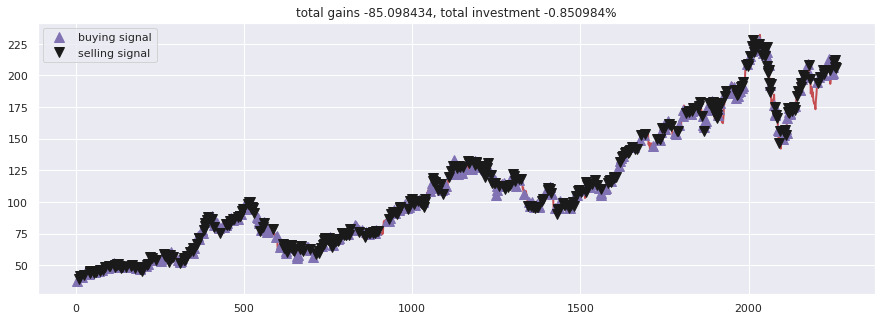

In [88]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Duel Curiosity Q-learning agent

In [89]:
from collections import deque
import random

df= df_full.copy()
name = 'Duel Curiosity Q-learning agent'

class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 500
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.state_size))
        self.ACTION = tf.placeholder(tf.float32, (None))
        self.REWARD = tf.placeholder(tf.float32, (None))
        self.batch_size = tf.shape(self.ACTION)[0]
        
        with tf.variable_scope('curiosity_model'):
            action = tf.reshape(self.ACTION, (-1,1))
            state_action = tf.concat([self.X, action], axis=1)
            save_state = tf.identity(self.Y)
            
            feed = tf.layers.dense(state_action, 32, activation=tf.nn.relu)
            self.curiosity_logits = tf.layers.dense(feed, self.state_size)
            self.curiosity_cost = tf.reduce_sum(tf.square(save_state - self.curiosity_logits), axis=1)
            
            self.curiosity_optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE)\
            .minimize(tf.reduce_mean(self.curiosity_cost))
        
        total_reward = tf.add(self.curiosity_cost, self.REWARD)
        
        with tf.variable_scope("q_model"):
            with tf.variable_scope("eval_net"):
                x_action = tf.layers.dense(self.X, 128, tf.nn.relu)
                tensor_action, tensor_validation = tf.split(x_action,2,1)
                feed_action = tf.layers.dense(tensor_action, self.OUTPUT_SIZE)
                feed_validation = tf.layers.dense(tensor_validation, 1)
                self.logits = feed_validation + \
                tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            
            with tf.variable_scope("target_net"):
                y_action = tf.layers.dense(self.Y, 128, tf.nn.relu)
                tensor_action, tensor_validation = tf.split(y_action,2,1)
                feed_action = tf.layers.dense(tensor_action, self.OUTPUT_SIZE)
                feed_validation = tf.layers.dense(tensor_validation, 1)
                y_q = feed_validation + \
                tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            
            q_target = total_reward + self.GAMMA * tf.reduce_max(y_q, axis=1)
            action = tf.cast(self.ACTION, tf.int32)
            action_indices = tf.stack([tf.range(self.batch_size, dtype=tf.int32), action], axis=1)
            q = tf.gather_nd(params=self.logits, indices=action_indices)
            self.cost = tf.losses.mean_squared_error(labels=q_target, predictions=q)
            self.optimizer = tf.train.RMSPropOptimizer(self.LEARNING_RATE).minimize(
            self.cost, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "q_model/eval_net"))
            
        t_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/target_net')
        e_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='q_model/eval_net')
        self.target_replace_op = [tf.assign(t, e) for t, e in zip(t_params, e_params)]
        
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, done):
        self.MEMORIES.append((state, action, reward, new_state, done))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action
    
    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        actions = np.array([a[1] for a in replay])
        rewards = np.array([a[2] for a in replay])
        new_states = np.array([a[3] for a in replay])
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.target_replace_op)
            
        cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict = {
            self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards
        })
        
        if (self.T_COPY + 1) % self.COPY == 0:
            self.sess.run(self.curiosity_optimizer, feed_dict = {
                self.X: states, self.Y: new_states, self.ACTION: actions, self.REWARD: rewards
            })
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                state = next_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [90]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

epoch: 10, total rewards: 1466.241473.3, cost: 27255.042969, total money: 5711.051457
epoch: 20, total rewards: 1236.331538.3, cost: 239848.343750, total money: 11027.321543
epoch: 30, total rewards: 2531.297079.3, cost: 1183450.500000, total money: 2061.807043
epoch: 40, total rewards: 662.982948.3, cost: 832100.875000, total money: 10662.982948
epoch: 50, total rewards: 2113.568725.3, cost: 12400498.000000, total money: 536.798693
epoch: 60, total rewards: 3384.174399.3, cost: 905189.187500, total money: 10318.014381
epoch: 70, total rewards: 2809.101333.3, cost: 2261290.500000, total money: 11367.851318
epoch: 80, total rewards: 6050.964086.3, cost: 3368291.500000, total money: 2161.244053
epoch: 90, total rewards: 2129.400191.3, cost: 6546062.000000, total money: 2479.430133
epoch: 100, total rewards: 11146.385772.3, cost: 6881320.000000, total money: 3730.685734
epoch: 110, total rewards: 1616.881228.3, cost: 2953078.500000, total money: 7615.661211
epoch: 120, total rewards: 1236

In [91]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 36.967144, total balance 9963.032856
day 1: buy 1 unit at price 36.830002, total balance 9926.202854
day 2: buy 1 unit at price 37.560001, total balance 9888.642853
day 5: buy 1 unit at price 38.148571, total balance 9850.494282
day 6: buy 1 unit at price 38.294285, total balance 9812.199997
day 7: buy 1 unit at price 38.602856, total balance 9773.597141
day 9, sell 1 unit at price 39.338570, investment 6.414956 %, total balance 9812.935711,
day 10: buy 1 unit at price 40.461430, total balance 9772.474281
day 11: buy 1 unit at price 40.538570, total balance 9731.935711
day 12: buy 1 unit at price 41.107143, total balance 9690.828568
day 14: buy 1 unit at price 41.759998, total balance 9649.068570
day 16, sell 1 unit at price 40.980000, investment 11.267982 %, total balance 9690.048570,
day 17: buy 1 unit at price 41.052856, total balance 9648.995714
day 18: buy 1 unit at price 40.535713, total balance 9608.460001
day 19: buy 1 unit at price 40.360001, total b

day 874: buy 1 unit at price 73.907143, total balance 9225.464337
day 875, sell 1 unit at price 75.381432, investment -3.083784 %, total balance 9300.845769,
day 878: buy 1 unit at price 75.891426, total balance 9224.954343
day 880: buy 1 unit at price 75.821426, total balance 9149.132917
day 881, sell 1 unit at price 75.777145, investment -3.384207 %, total balance 9224.910062,
day 882, sell 1 unit at price 75.845711, investment -4.255934 %, total balance 9300.755773,
day 883, sell 1 unit at price 76.584282, investment -0.080151 %, total balance 9377.340055,
day 884, sell 1 unit at price 76.658569, investment 0.164255 %, total balance 9453.998624,
day 887: buy 1 unit at price 75.248573, total balance 9378.750051
day 888: buy 1 unit at price 75.914284, total balance 9302.835767
day 889: buy 1 unit at price 75.894287, total balance 9226.941480
day 890, sell 1 unit at price 75.528572, investment -5.142096 %, total balance 9302.470052,
day 891, sell 1 unit at price 76.124283, investment -

day 1690, sell 1 unit at price 153.800003, investment 4.583167 %, total balance 10546.744355,
day 1691: buy 1 unit at price 153.339996, total balance 10393.404359
day 1693, sell 1 unit at price 153.610001, investment 4.831776 %, total balance 10547.014360,
day 1695, sell 1 unit at price 152.759995, investment -0.163388 %, total balance 10699.774355,
day 1696, sell 1 unit at price 153.179993, investment -0.526016 %, total balance 10852.954348,
day 1698, sell 1 unit at price 153.929993, investment 0.437164 %, total balance 11006.884341,
day 1699, sell 1 unit at price 154.449997, investment -0.802826 %, total balance 11161.334338,
day 1700, sell 1 unit at price 155.369995, investment 3.407651 %, total balance 11316.704333,
day 1703, sell 1 unit at price 145.419998, investment -5.164992 %, total balance 11462.124331,
day 1704: buy 1 unit at price 146.589996, total balance 11315.534335
day 1706: buy 1 unit at price 144.289993, total balance 11171.244342
day 1709, sell 1 unit at price 145.00

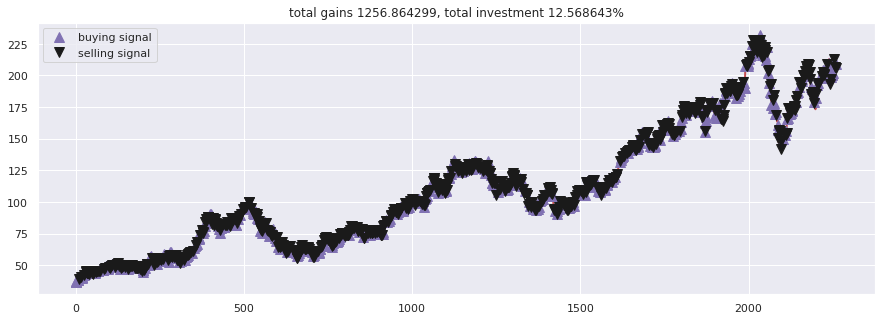

In [92]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Neuro-evolution agent

In [93]:
df= df_full.copy()
name = 'Neuro-evolution agent'

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1

In [94]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.id = id_

def relu(X):
    return np.maximum(X, 0)
    
def softmax(X):
    e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
    a1 = np.dot(X, nets.W1)
    z1 = relu(a1)
    a2 = np.dot(z1, nets.W2)
    return softmax(a2)

In [95]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        
    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))
    
    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual
    
    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child
    
    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]
    
    def buy(self, individual):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []
        
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((self.trend[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, self.trend[t], invest, initial_money)
                )
            state = next_state
        
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []
            
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)
            
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]

                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    starting_money += self.trend[t]

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest
    
    def evolve(self, generations=20, checkpoint= 5):
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            fitnesses = [i.fitness for i in self.population]
            sort_fitness = np.argsort(fitnesses)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0], 
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
        return fittest_individual

In [96]:
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)

In [97]:
fittest_nets = neural_evolve.evolve(50)

epoch 5, fittest individual 71 with accuracy 24.806229
epoch 10, fittest individual 56 with accuracy 25.697685
epoch 15, fittest individual 0 with accuracy 31.271799
epoch 20, fittest individual 0 with accuracy 32.815499
epoch 25, fittest individual 0 with accuracy 32.815499
epoch 30, fittest individual 91 with accuracy 34.044787
epoch 35, fittest individual 0 with accuracy 45.659814
epoch 40, fittest individual 0 with accuracy 45.659814
epoch 45, fittest individual 0 with accuracy 53.991229
epoch 50, fittest individual 0 with accuracy 53.991229


In [98]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets)

day 1: buy 1 unit at price 36.830002, total balance 9963.169998
day 2, sell 1 unit at price 37.560001, investment 1.982077 %, total balance 10000.729999,
day 18: buy 1 unit at price 40.535713, total balance 9960.194286
day 20, sell 1 unit at price 39.805714, investment -1.800879 %, total balance 10000.000000,
day 26: buy 1 unit at price 42.648571, total balance 9957.351429
day 27, sell 1 unit at price 42.877144, investment 0.535945 %, total balance 10000.228573,
day 32: buy 1 unit at price 44.361427, total balance 9955.867146
day 33: buy 1 unit at price 44.217144, total balance 9911.650002
day 34: buy 1 unit at price 43.924286, total balance 9867.725716
day 35, sell 1 unit at price 44.119999, investment -0.544230 %, total balance 9911.845715,
day 36, sell 1 unit at price 44.007141, investment -0.474936 %, total balance 9955.852856,
day 37, sell 1 unit at price 43.975716, investment 0.117088 %, total balance 9999.828572,
day 45: buy 1 unit at price 45.517143, total balance 9954.311429
d

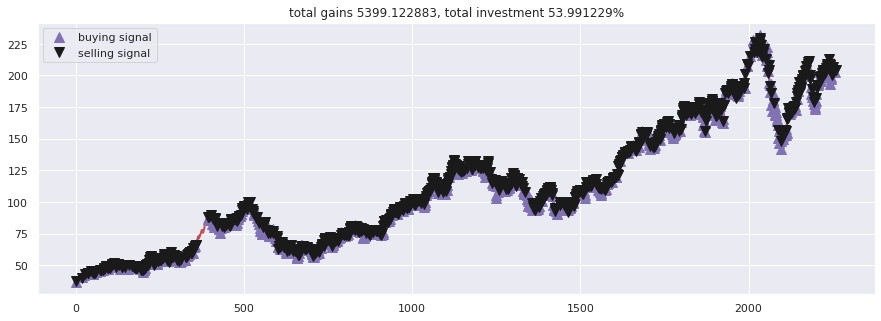

In [99]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

## Neuro-evolution with Novelty search agent

In [100]:
df= df_full.copy()
name = 'Neuro-evolution with Novelty search agent'

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1

novelty_search_threshold = 6
novelty_log_maxlen = 1000
backlog_maxsize = 500
novelty_log_add_amount = 3

In [101]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.last_features = None
        self.id = id_

def relu(X):
    return np.maximum(X, 0)
    
def softmax(X):
    e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
    a1 = np.dot(X, nets.W1)
    z1 = relu(a1)
    a2 = np.dot(z1, nets.W2)
    return softmax(a2)

In [102]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        self.generation_backlog = []
        self.novel_backlog = []
        self.novel_pop = []
        
    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))
    
    def _memorize(self, q, i, limit):
        q.append(i)
        if len(q) > limit:
            q.pop()
    
    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual
    
    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child
    
    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]
    
    def buy(self, individual):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []
        
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((self.trend[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, self.trend[t], invest, initial_money)
                )
            state = next_state
        
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []
            
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)
            
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]

                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    starting_money += self.trend[t]

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest
            self.population[i].last_features = self.population[i].W2.flatten()
    
    def evaluate(self, individual, backlog, pop, k = 4):
        score = 0
        if len(backlog):
            x = np.array(backlog)
            nn = NearestNeighbors(n_neighbors = k, metric = 'euclidean').fit(np.array(backlog))
            d, _ = nn.kneighbors([individual])
            score += np.mean(d)
        
        if len(pop):
            nn = NearestNeighbors(n_neighbors = k, metric = 'euclidean').fit(np.array(pop))
            d, _ = nn.kneighbors([individual])
            score += np.mean(d)
        
        return score
    
    def evolve(self, generations=20, checkpoint= 5):
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            scores = [self.evaluate(p.last_features, self.novel_backlog, self.novel_pop) for p in self.population]
            sort_fitness = np.argsort(scores)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0], 
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            
            for p in next_population:
                if p.last_features is not None:
                    self._memorize(self.novel_pop, p.last_features, backlog_maxsize)
                    if np.random.randint(0,10) < novelty_search_threshold:
                        self._memorize(self.novel_backlog, p.last_features, novelty_log_maxlen)
                        
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
            
            if np.random.randint(0,10) < novelty_search_threshold:
                pop_sorted = sorted(self.population, key=lambda p: p.fitness, reverse=True)
                self.generation_backlog.append(pop_sorted[0])
                print('novel add fittest, score: %f, backlog size: %d'%(pop_sorted[0].fitness, 
                                                                        len(self.generation_backlog)))
                generation_backlog_temp = self.generation_backlog
                if len(self.generation_backlog) > backlog_maxsize:
                    generation_backlog_temp = random.sample(generation_backlog, backlog_maxsize)
                for p in generation_backlog_temp:
                    if p.last_features is not None:
                        self._memorize(self.novel_backlog, p.last_features, novelty_log_maxlen)
                        
        return fittest_individual

In [106]:
!pip install sklearn

     |████████████████████████████████| 6.7MB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 286kB 42.5MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=949950a7d7c0d07e56deb16e6baf2e1fb6539a2afbdc4e6d4e8de6841ee69ff1
  Stored in directory: /home/sahand/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [107]:
from sklearn.neighbors import NearestNeighbors
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)

In [108]:
fittest_nets = neural_evolve.evolve(100)

novel add fittest, score: 20.994927, backlog size: 1
novel add fittest, score: 3.245342, backlog size: 2
epoch 5, fittest individual 74 with accuracy -99.448828
novel add fittest, score: 12.534400, backlog size: 3
novel add fittest, score: 7.384671, backlog size: 4
epoch 10, fittest individual 87 with accuracy -2.913213
novel add fittest, score: 0.000000, backlog size: 5
novel add fittest, score: 6.526956, backlog size: 6
novel add fittest, score: 10.444614, backlog size: 7
novel add fittest, score: 7.662786, backlog size: 8
epoch 15, fittest individual 92 with accuracy -97.335072
novel add fittest, score: 5.835570, backlog size: 9
novel add fittest, score: 5.674671, backlog size: 10
novel add fittest, score: 7.834712, backlog size: 11
epoch 20, fittest individual 60 with accuracy -95.773771
novel add fittest, score: 0.000000, backlog size: 12
novel add fittest, score: 0.000000, backlog size: 13
novel add fittest, score: 0.000000, backlog size: 14
epoch 25, fittest individual 67 with a

In [109]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets)

day 4: buy 1 unit at price 37.630001, total balance 9962.369999
day 5: buy 1 unit at price 38.148571, total balance 9924.221428
day 7, sell 1 unit at price 38.602856, investment 2.585317 %, total balance 9962.824284,
day 9, sell 1 unit at price 39.338570, investment 3.119380 %, total balance 10002.162854,
day 10: buy 1 unit at price 40.461430, total balance 9961.701424
day 11, sell 1 unit at price 40.538570, investment 0.190651 %, total balance 10002.239994,
day 12: buy 1 unit at price 41.107143, total balance 9961.132851
day 13, sell 1 unit at price 41.274284, investment 0.406598 %, total balance 10002.407135,
day 14: buy 1 unit at price 41.759998, total balance 9960.647137
day 15, sell 1 unit at price 41.594284, investment -0.396825 %, total balance 10002.241421,
day 16: buy 1 unit at price 40.980000, total balance 9961.261421
day 17: buy 1 unit at price 41.052856, total balance 9920.208565
day 18: buy 1 unit at price 40.535713, total balance 9879.672852
day 19: buy 1 unit at price 4

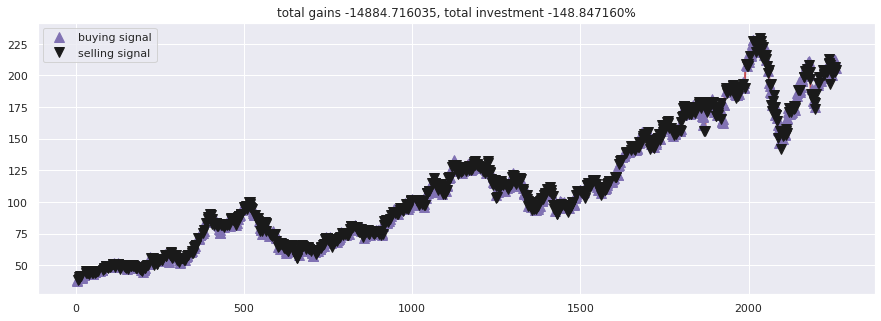

In [110]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

## ABCD strategy agent

In [5]:
df= df_full.copy()
name = 'ABCD strategy agent'

def abcd(trend, skip_loop = 4, ma = 7):
    ma = pd.Series(trend).rolling(ma).mean().values
    x = []
    for a in range(ma.shape[0]):
        for b in range(a, ma.shape[0], skip_loop):
            for c in range(b, ma.shape[0], skip_loop):
                for d in range(c, ma.shape[0], skip_loop):
                    if ma[b] > ma[a] and \
                    (ma[c] < ma[b] and ma[c] > ma[a]) \
                    and ma[d] > ma[b]:
                        x.append([a,b,c,d])
    x_np = np.array(x)
    ac = x_np[:,0].tolist() + x_np[:,2].tolist()
    bd = x_np[:,1].tolist() + x_np[:,3].tolist()
    ac_set = set(ac)
    bd_set = set(bd)
    signal = np.zeros(len(trend))
    buy = list(ac_set - bd_set)
    sell = list(list(bd_set - ac_set))
    signal[buy] = 1.0
    signal[sell] = -1.0
    return signal

In [ ]:
%%time
signal = abcd(df['Close'])

In [ ]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 10000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    states_money = []
    current_inventory = 0
    
    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory
    
    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
        states_money.append(initial_money)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest, states_money

In [ ]:
states_buy, states_sell, total_gains, invest, states_money = buy_stock(df.Close, signal)

In [ ]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(states_money, color='r', lw=2.)
plt.plot(states_money, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(states_money, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.legend()
plt.show()

## Deep Evolution Strategy

In [ ]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [ ]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

In [ ]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [ ]:
df= df_full.copy()
name = 'Deep Evolution Strategy'

In [ ]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [ ]:
close = df.Close.values.tolist()
get_state(close, 0, 10)

In [ ]:
get_state(close, 1, 10)

In [ ]:
get_state(close, 2, 10)

In [ ]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

In [ ]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [ ]:
window_size = 30
model = Model(window_size, 500, 3)

In [ ]:
initial_money = 10000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

In [ ]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.savefig('output/'+name+'.png')
        plt.show()

In [ ]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 5,
    max_sell = 5,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [ ]:
agent.fit(iterations = 500, checkpoint = 10)

In [ ]:
agent.buy()